## R for Data Science

[book link](https://r4ds.had.co.nz/index.html)

### The Data Science Pipeline

![](https://r4ds.had.co.nz/diagrams/data-science.png)

First you must import your data into R. This typically means that you take data stored in a file, database, or web API, and load it into a data frame in R. If you can’t get your data into R, you can’t do data science on it!

Once you’ve imported your data, it is a good idea to tidy it. Tidying your data means storing it in a consistent form that matches the semantics of the dataset with the way it is stored. In brief, when your data is tidy, each column is a variable, and each row is an observation. Tidy data is important because the consistent structure lets you focus your struggle on questions about the data, not fighting to get the data into the right form for different functions.

Once you have tidy data, a common first step is to transform it. Transformation includes narrowing in on observations of interest (like all people in one city, or all data from the last year), creating new variables that are functions of existing variables (like computing speed from distance and time), and calculating a set of summary statistics (like counts or means). Together, tidying and transforming are called wrangling, because getting your data in a form that’s natural to work with often feels like a fight!

Once you have tidy data with the variables you need, there are two main engines of knowledge generation: visualisation and modelling. These have complementary strengths and weaknesses so any real analysis will iterate between them many times.

Visualisation is a fundamentally human activity. A good visualisation will show you things that you did not expect, or raise new questions about the data. A good visualisation might also hint that you’re asking the wrong question, or you need to collect different data. Visualisations can surprise you, but don’t scale particularly well because they require a human to interpret them.

Models are complementary tools to visualisation. Once you have made your questions sufficiently precise, you can use a model to answer them. Models are a fundamentally mathematical or computational tool, so they generally scale well. Even when they don’t, it’s usually cheaper to buy more computers than it is to buy more brains! But every model makes assumptions, and by its very nature a model cannot question its own assumptions. That means a model cannot fundamentally surprise you.

The last step of data science is communication, an absolutely critical part of any data analysis project. It doesn’t matter how well your models and visualisation have led you to understand the data unless you can also communicate your results to others.

Surrounding all these tools is programming. Programming is a cross-cutting tool that you use in every part of the project. You don’t need to be an expert programmer to be a data scientist, but learning more about programming pays off because becoming a better programmer allows you to automate common tasks, and solve new problems with greater ease.

You’ll use these tools in every data science project, but for most projects they’re not enough. There’s a rough 80-20 rule at play; you can tackle about 80% of every project using the tools that you’ll learn in this book, but you’ll need other tools to tackle the remaining 20%. Throughout this book we’ll point you to resources where you can learn more.

In [1]:
# install.packages("tidyverse")

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
# install.packages(c("nycflights13", "gapminder", "Lahman"))


## Data visualisation

[link](https://r4ds.had.co.nz/data-visualisation.html)

> “The simple graph has brought more information to the data analyst’s mind than any other device.” — John Tukey

### mpg dataframe

    Question: Do cars with big engines use more fuel than cars with small engines? What does the relationship between engine size and fuel efficiency look like? Is it positive? Negative? Linear? Nonlinear?
    
You can test your answer with the mpg data frame found in ggplot2 (aka ggplot2::mpg). A data frame is a rectangular collection of variables (in the columns) and observations (in the rows). mpg contains observations collected by the US Environmental Protection Agency on 38 models of car.



In [4]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


Among the variables in mpg are:

1. displ, a car’s engine size, in litres.

2. hwy, a car’s fuel efficiency on the highway, in miles per gallon (mpg). 

A car with a low fuel efficiency consumes more fuel than a car with a high fuel efficiency when they travel the same distance.



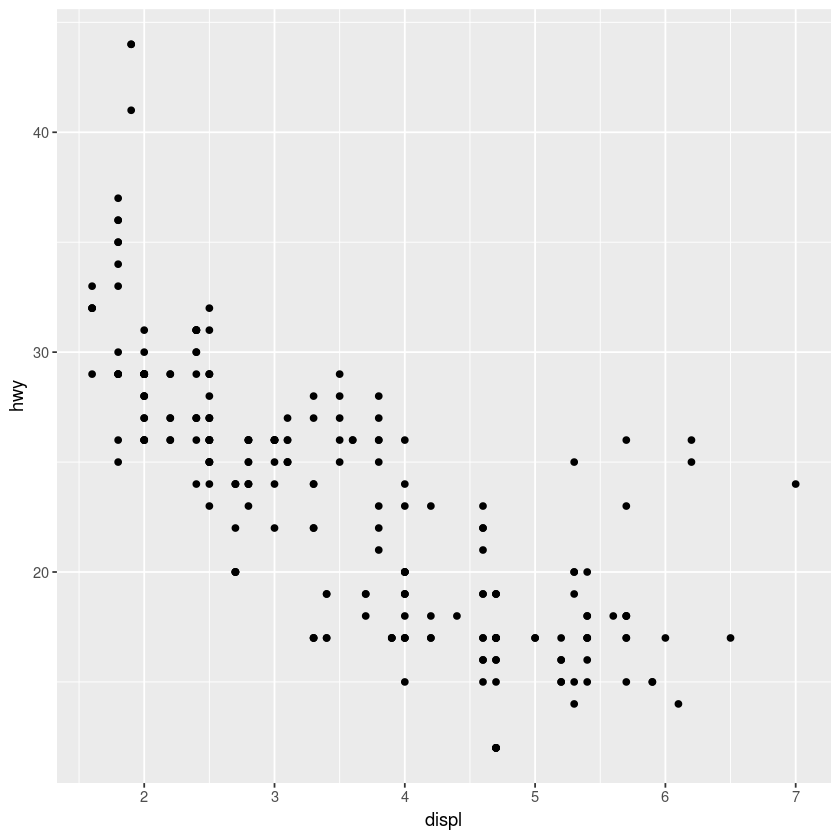

In [5]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy))

The plot shows a negative relationship between engine size (displ) and fuel efficiency (hwy). In other words, cars with big engines use more fuel. Does this confirm or refute your hypothesis about fuel efficiency and engine size?

With ggplot2, you begin a plot with the function ggplot(). ggplot() creates a coordinate system that you can add layers to. The first argument of ggplot() is the dataset to use in the graph. So ggplot(data = mpg) creates an empty graph, but it’s not very interesting so I’m not going to show it here.

You complete your graph by adding one or more layers to ggplot(). The function geom_point() adds a layer of points to your plot, which creates a scatterplot. ggplot2 comes with many geom functions that each add a different type of layer to a plot. You’ll learn a whole bunch of them throughout this chapter.

Each geom function in ggplot2 takes a mapping argument. This defines how variables in your dataset are mapped to visual properties. The mapping argument is always paired with aes(), and the x and y arguments of aes() specify which variables to map to the x and y axes. ggplot2 looks for the mapped variables in the data argument, in this case, mpg.

Let’s turn this code into a reusable template for making graphs with ggplot2. To make a graph, replace the bracketed sections in the code below with a dataset, a geom function, or a collection of mappings.

```R

ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
      
```

The rest of this chapter will show you how to complete and extend this template to make different types of graphs. We will begin with the <MAPPINGS> component.
    
### Exercises

Run ggplot(data = mpg). What do you see? - Blank canvas

How many rows are in mpg? How many columns? 234, 11

What does the drv variable describe? Read the help for ?mpg to find out. - f = front-wheel drive, r = rear wheel drive, 4 = 4wd

Make a scatterplot of hwy vs cyl.

What happens if you make a scatterplot of class vs drv? Why is the plot not useful? Both are categorical vars

In [6]:
dim(mpg)

[1] 234  11

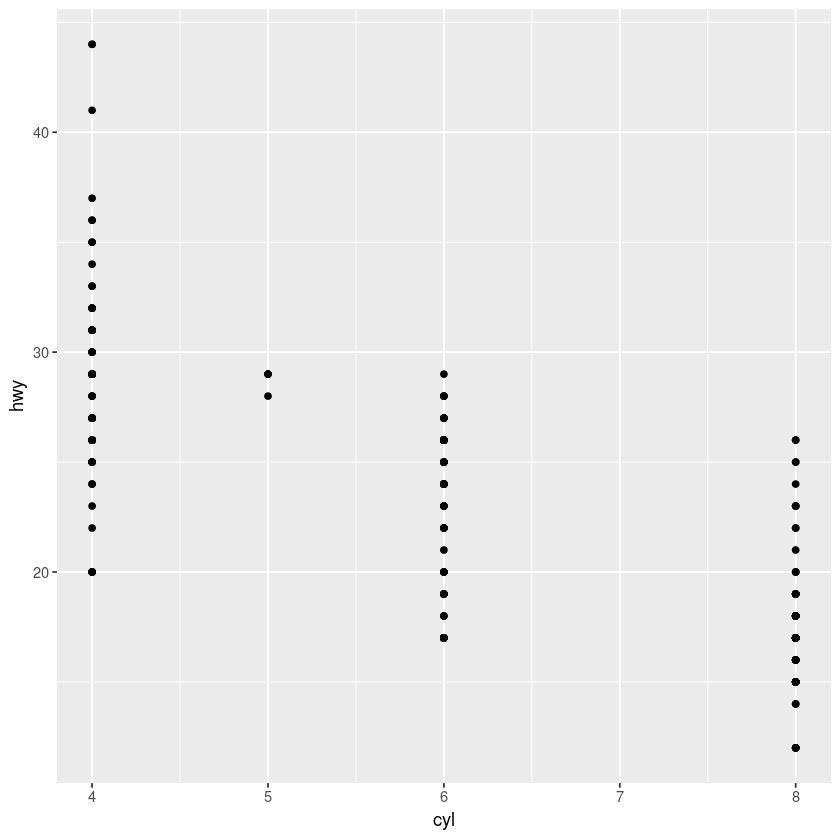

In [7]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = cyl, y = hwy))

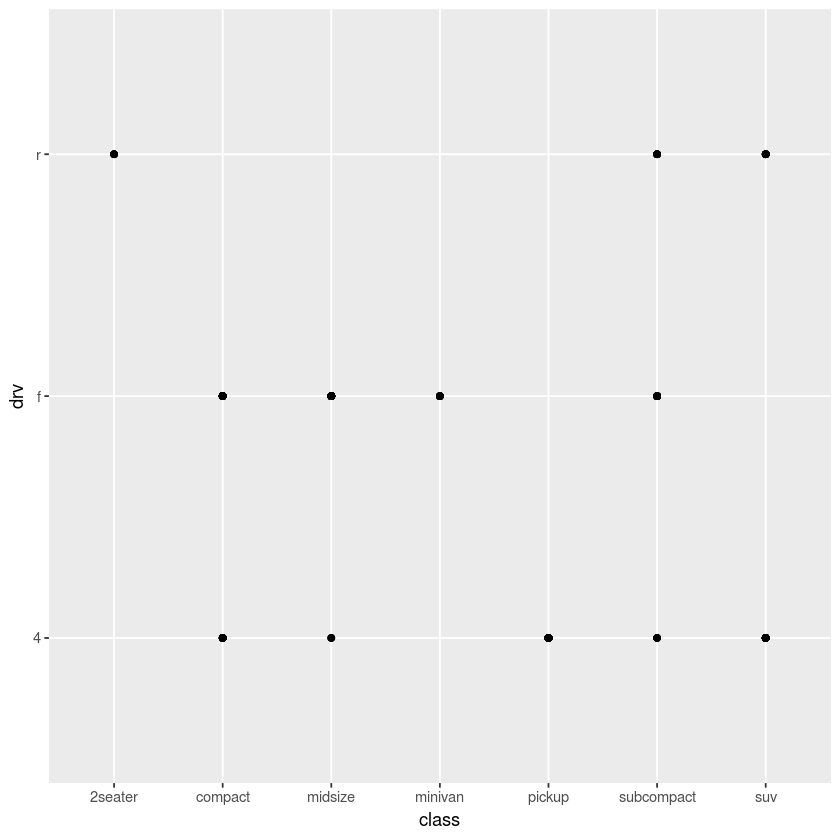

In [8]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = class, y = drv))

###  Aesthetic mappings

In the plot below, one group of points (highlighted in red) seems to fall outside of the linear trend. These cars have a higher mileage than you might expect. How can you explain these cars?

![](https://r4ds.had.co.nz/visualize_files/figure-html/unnamed-chunk-6-1.png)

Let’s hypothesize that the cars are hybrids. One way to test this hypothesis is to look at the class value for each car. The class variable of the mpg dataset classifies cars into groups such as compact, midsize, and SUV. If the outlying points are hybrids, they should be classified as compact cars or, perhaps, subcompact cars (keep in mind that this data was collected before hybrid trucks and SUVs became popular).

You can add a third variable, like class, to a two dimensional scatterplot by mapping it to an aesthetic. An aesthetic is a visual property of the objects in your plot. Aesthetics include things like the size, the shape, or the color of your points. You can display a point (like the one below) in different ways by changing the values of its aesthetic properties. Since we already use the word “value” to describe data, let’s use the word “level” to describe aesthetic properties. Here we change the levels of a point’s size, shape, and color to make the point small, triangular, or blue:

You can convey information about your data by mapping the aesthetics in your plot to the variables in your dataset. For example, you can map the colors of your points to the class variable to reveal the class of each car.



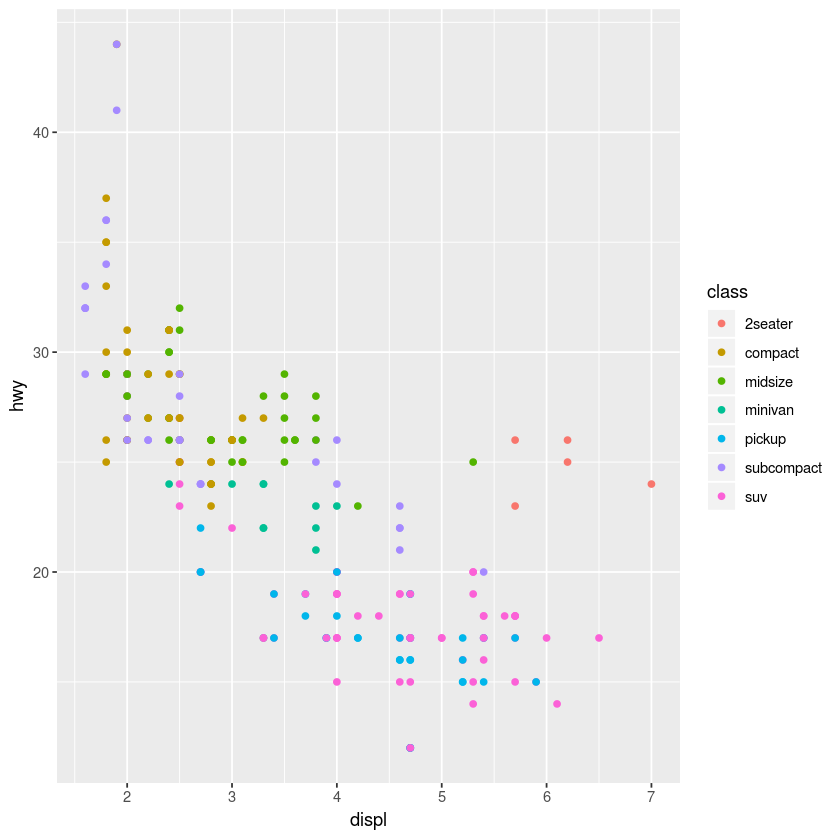

In [9]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class))

To map an aesthetic to a variable, associate the name of the aesthetic to the name of the variable inside aes(). ggplot2 will automatically assign a unique level of the aesthetic (here a unique color) to each unique value of the variable, a process known as scaling. ggplot2 will also add a legend that explains which levels correspond to which values.

The colors reveal that many of the unusual points are two-seater cars. These cars don’t seem like hybrids, and are, in fact, sports cars! Sports cars have large engines like SUVs and pickup trucks, but small bodies like midsize and compact cars, which improves their gas mileage. In hindsight, these cars were unlikely to be hybrids since they have large engines.

In the above example, we mapped class to the color aesthetic, but we could have mapped class to the size aesthetic in the same way. In this case, the exact size of each point would reveal its class affiliation. We get a warning here, because mapping an unordered variable (class) to an ordered aesthetic (size) is not a good idea.



Warning message:
“Using size for a discrete variable is not advised.”

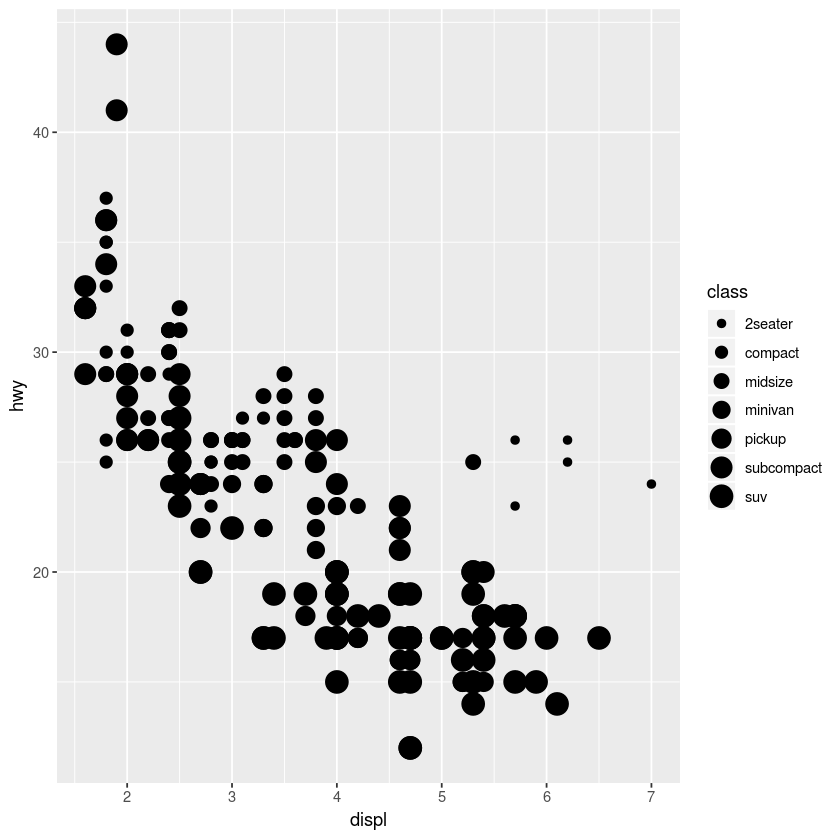

In [10]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, size = class))

Or we could have mapped class to the alpha aesthetic, which controls the transparency of the points, or to the shape aesthetic, which controls the shape of the points.



Warning message:
“Using alpha for a discrete variable is not advised.”

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 62 rows containing missing values (geom_point).”

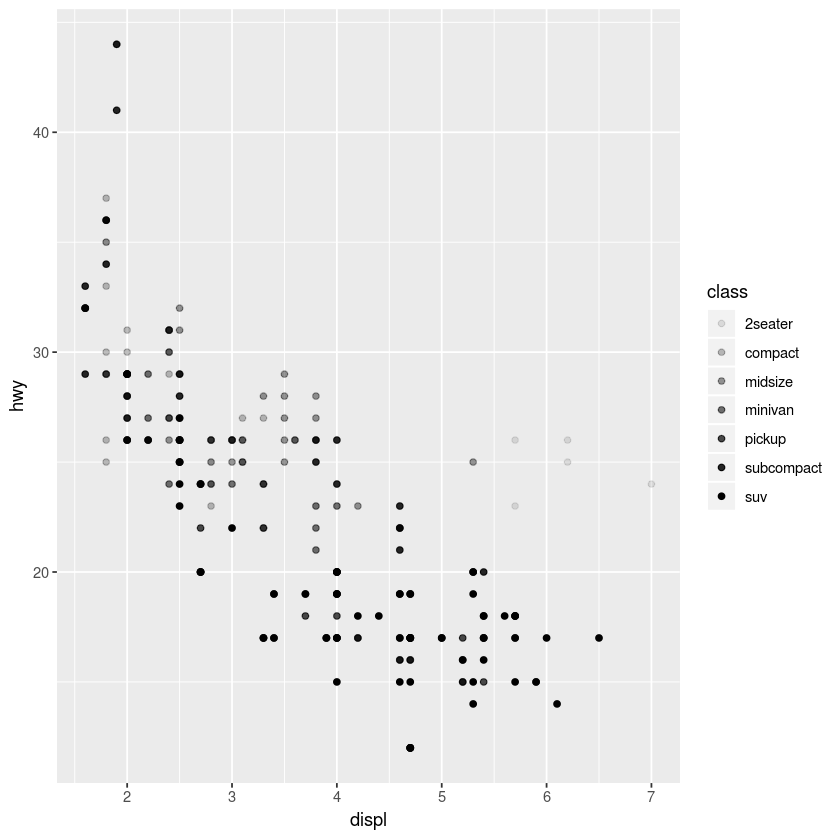

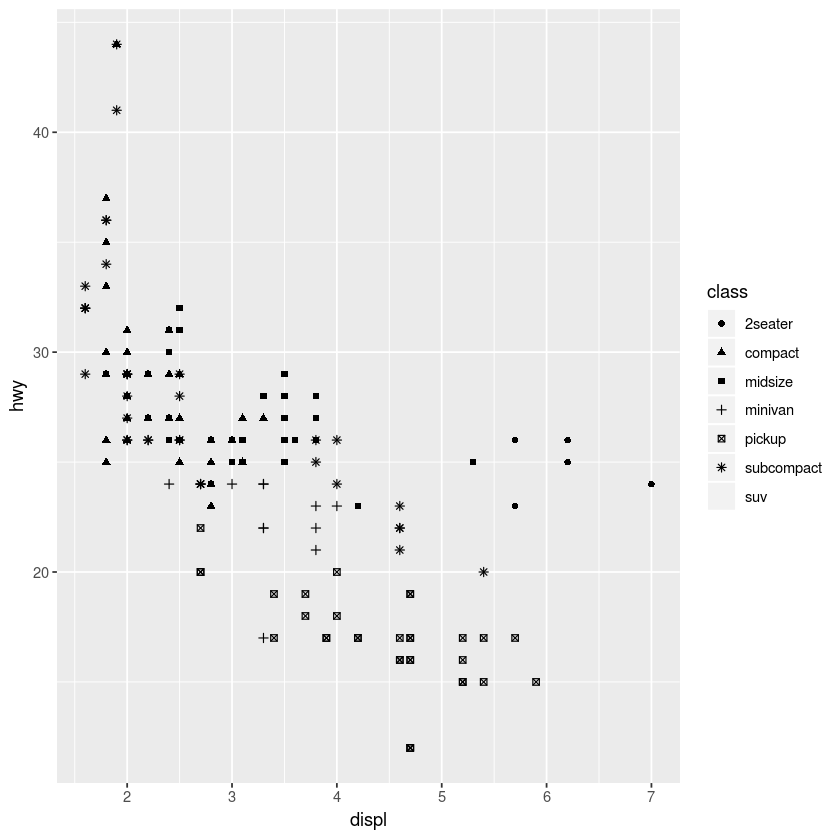

In [11]:
# Left
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, alpha = class))

# Right
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = class))

What happened to the SUVs? ggplot2 will only use six shapes at a time. By default, additional groups will go unplotted when you use the shape aesthetic.

What happened to the SUVs? ggplot2 will only use six shapes at a time. By default, additional groups will go unplotted when you use the shape aesthetic.

For each aesthetic, you use aes() to associate the name of the aesthetic with a variable to display. The aes() function gathers together each of the aesthetic mappings used by a layer and passes them to the layer’s mapping argument. The syntax highlights a useful insight about x and y: the x and y locations of a point are themselves aesthetics, visual properties that you can map to variables to display information about the data.

Once you map an aesthetic, ggplot2 takes care of the rest. It selects a reasonable scale to use with the aesthetic, and it constructs a legend that explains the mapping between levels and values. For x and y aesthetics, ggplot2 does not create a legend, but it creates an axis line with tick marks and a label. The axis line acts as a legend; it explains the mapping between locations and values.

You can also set the aesthetic properties of your geom manually. For example, we can make all of the points in our plot blue:

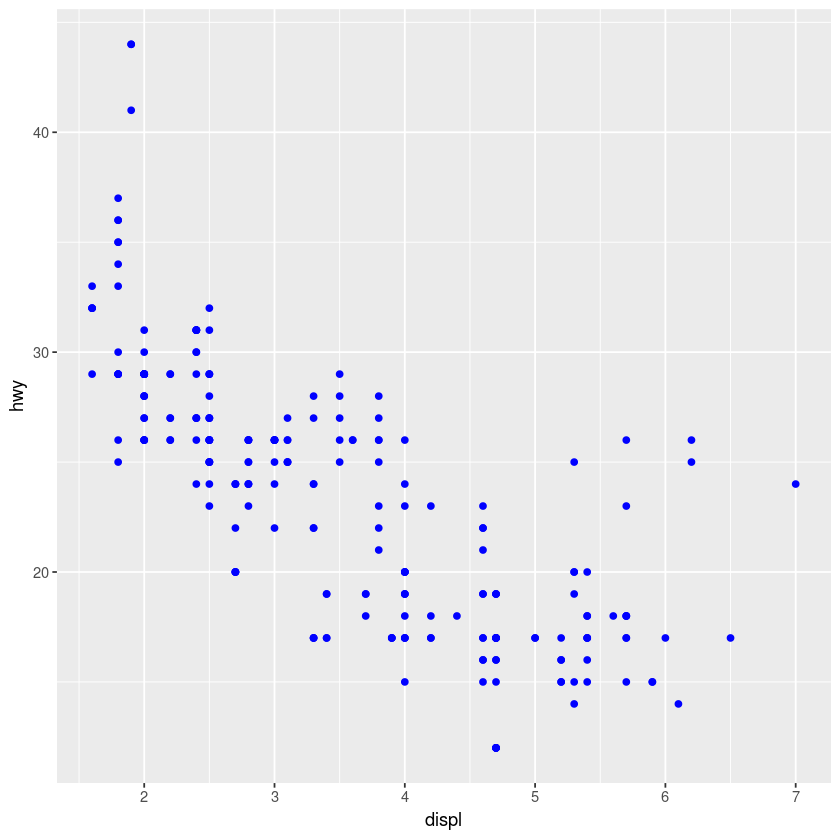

In [12]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

Here, the color doesn’t convey information about a variable, but only changes the appearance of the plot. To set an aesthetic manually, set the aesthetic by name as an argument of your geom function; i.e. it goes outside of aes(). You’ll need to pick a level that makes sense for that aesthetic:

- The name of a color as a character string.

- The size of a point in mm.

- The shape of a point as a number, as shown in Figure 3.1.

![](https://r4ds.had.co.nz/visualize_files/figure-html/shapes-1.png)

R has 25 built in shapes that are identified by numbers. There are some seeming duplicates: for example, 0, 15, and 22 are all squares. The difference comes from the interaction of the colour and fill aesthetics. The hollow shapes (0–14) have a border determined by colour; the solid shapes (15–18) are filled with colour; the filled shapes (21–24) have a border of colour and are filled with fill.

### Exercises

- What’s gone wrong with this code? Why are the points not blue? - was assigned as a level



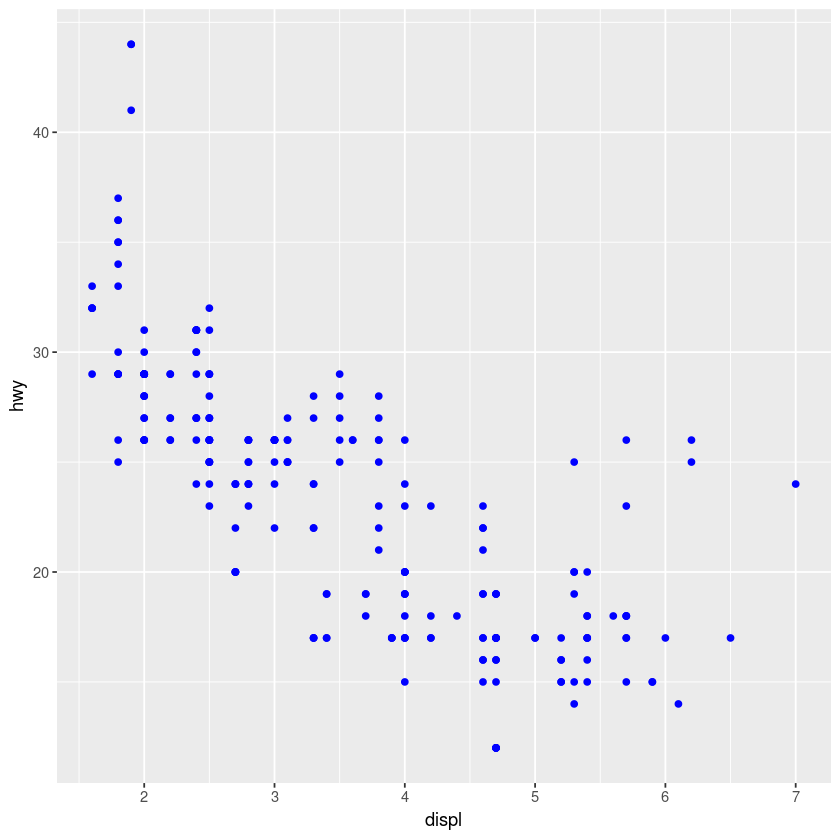

In [13]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

- Which variables in mpg are categorical? Which variables are continuous? (Hint: type ?mpg to read the documentation for the dataset). How can you see this information when you run mpg?

Categorical: manufacturer, model, trans, drv, fl, class	


Continuous: displ, year, cyl, cty, hwy 

- Map a continuous variable to color, size, and shape. How do these aesthetics behave differently for categorical vs. continuous variables?

- What happens if you map the same variable to multiple aesthetics?

- What does the stroke aesthetic do? What shapes does it work with? (Hint: use ?geom_point)

- What happens if you map an aesthetic to something other than a variable name, like aes(colour = displ < 5)? Note, you’ll also need to specify x and y.

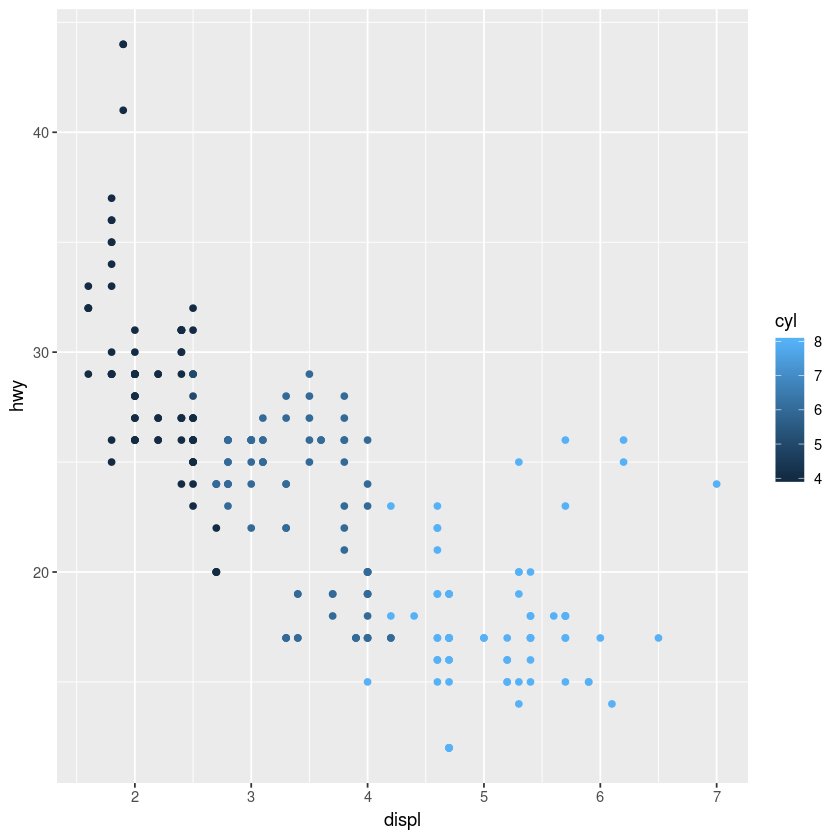

In [14]:
# mapping cont var (cyl) to color
# Note: a cont var CANNOT be mapped to shape, for obvious reasons

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = cyl))

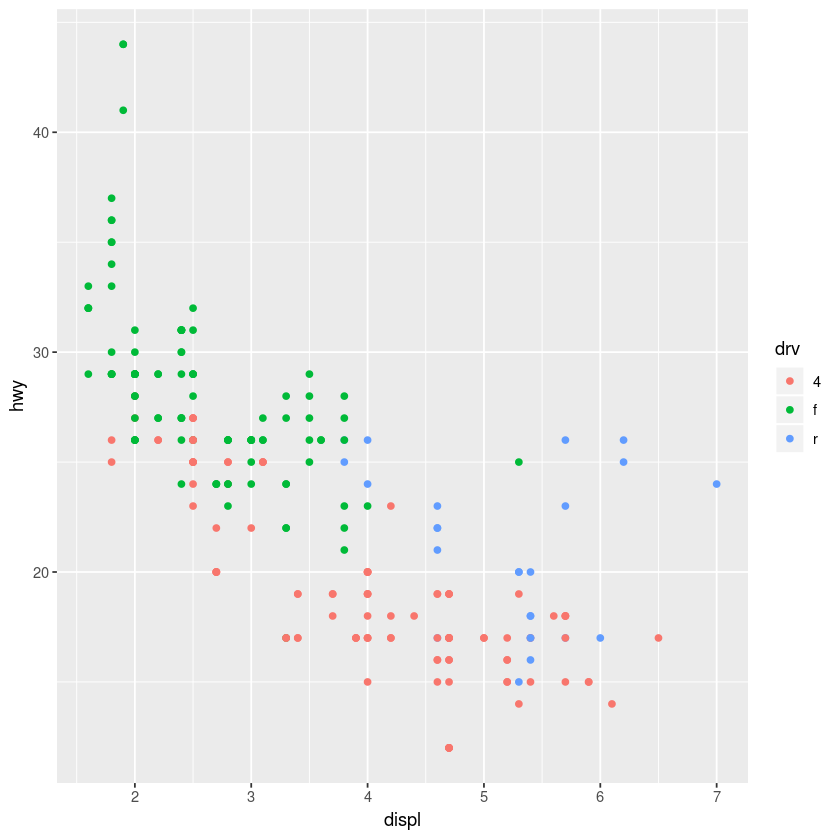

In [15]:
# mapping cat var (drv) to color
# Note: a cat var SHOULD NOT be mapped to size, which have an order to them, for obvious reasons.
# shape and color work fine 

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = drv))

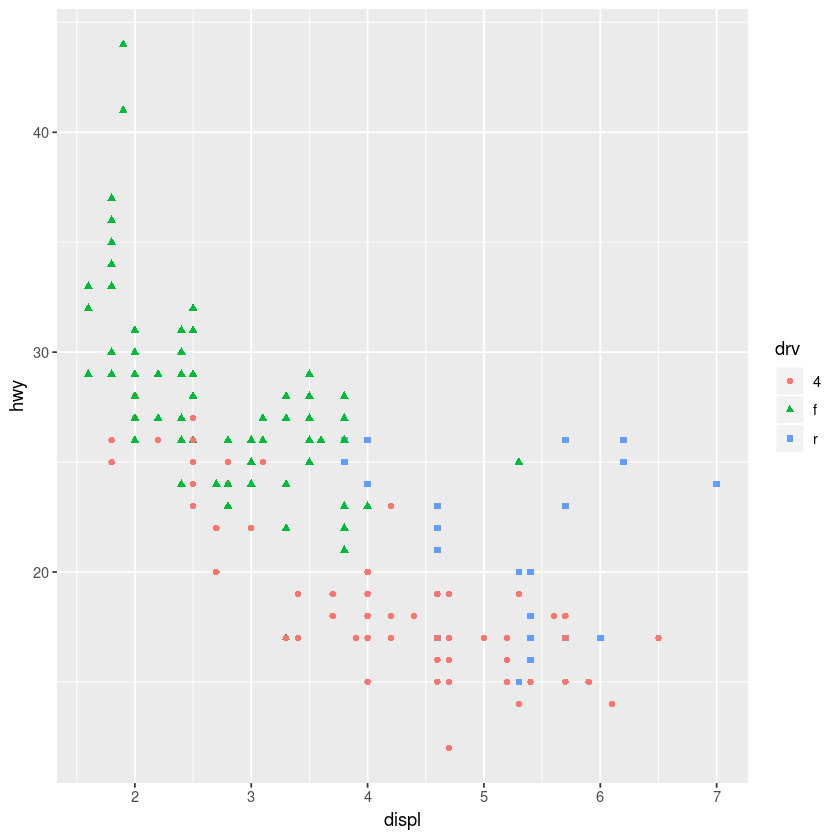

In [16]:
# mapping the var: drv to both color and shape.. effect is quite nice

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = drv, shape = drv))

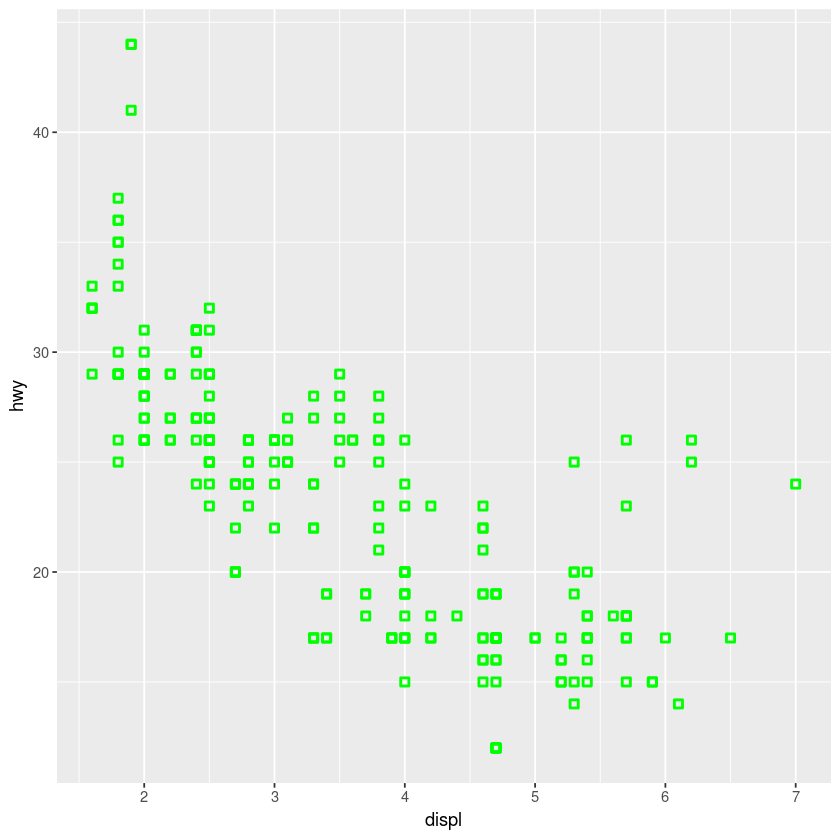

In [17]:
# stroke, shape and color

ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy), shape = 0, color = "green", stroke = 1.2)

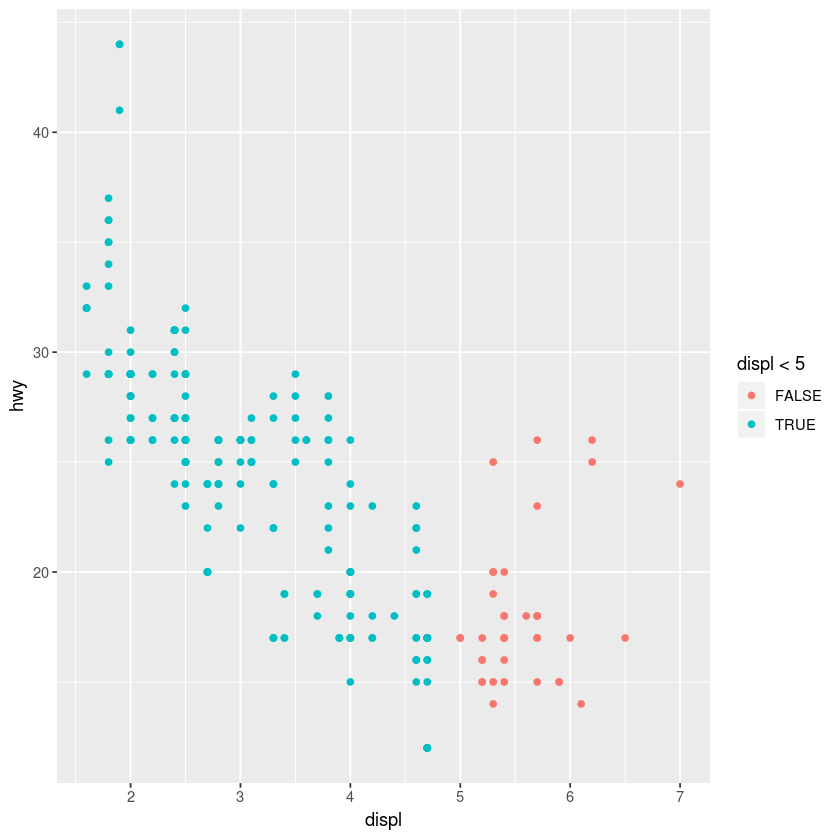

In [18]:
# mapping color to a condn : which evals to T or F, hence we get 2 color levels

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = displ < 5))

### Facets

One way to add additional variables is with aesthetics. Another way, particularly useful for categorical variables, is to split your plot into facets, subplots that each display one subset of the data.

To facet your plot by a single variable, use facet_wrap(). The first argument of facet_wrap() should be a formula, which you create with ~ followed by a variable name (here “formula” is the name of a data structure in R, not a synonym for “equation”). The variable that you pass to facet_wrap() should be discrete.



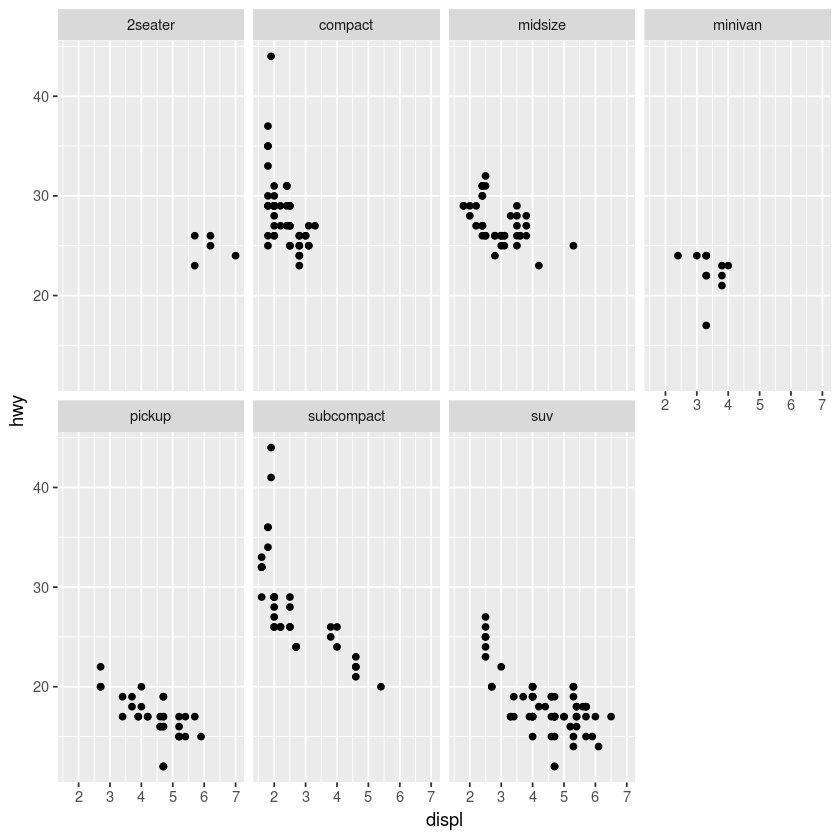

In [19]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy)) +
    facet_wrap(~ class, nrow = 2)

To facet your plot on the combination of two variables, add facet_grid() to your plot call. The first argument of facet_grid() is also a formula. This time the formula should contain two variable names separated by a ~.



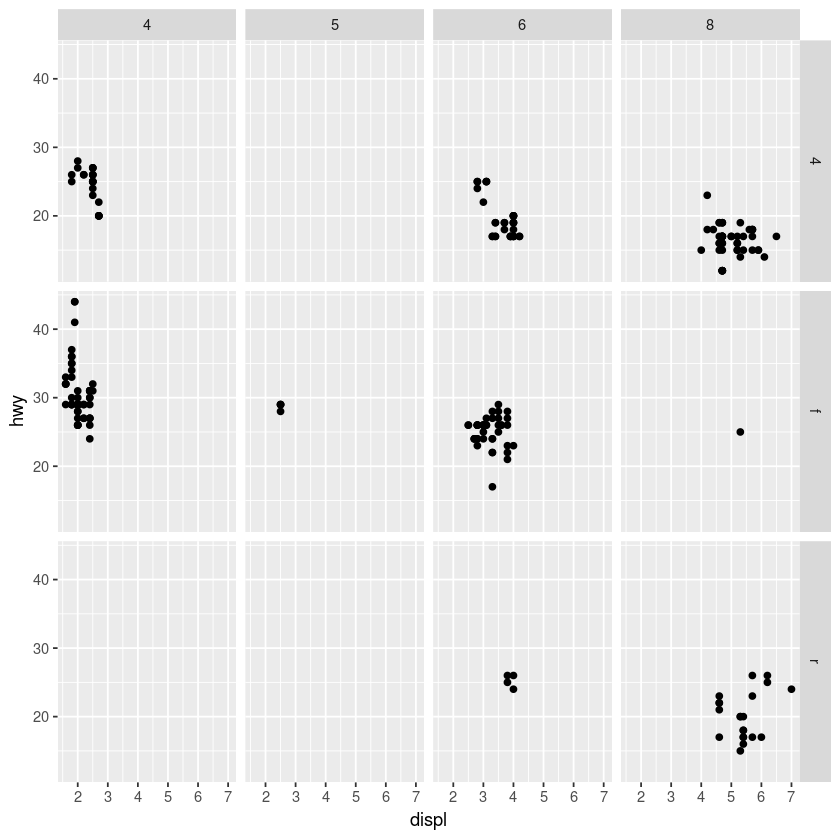

In [20]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy)) +
    facet_grid(drv ~ cyl)

### Exercises

1. What happens if you facet on a continuous variable?



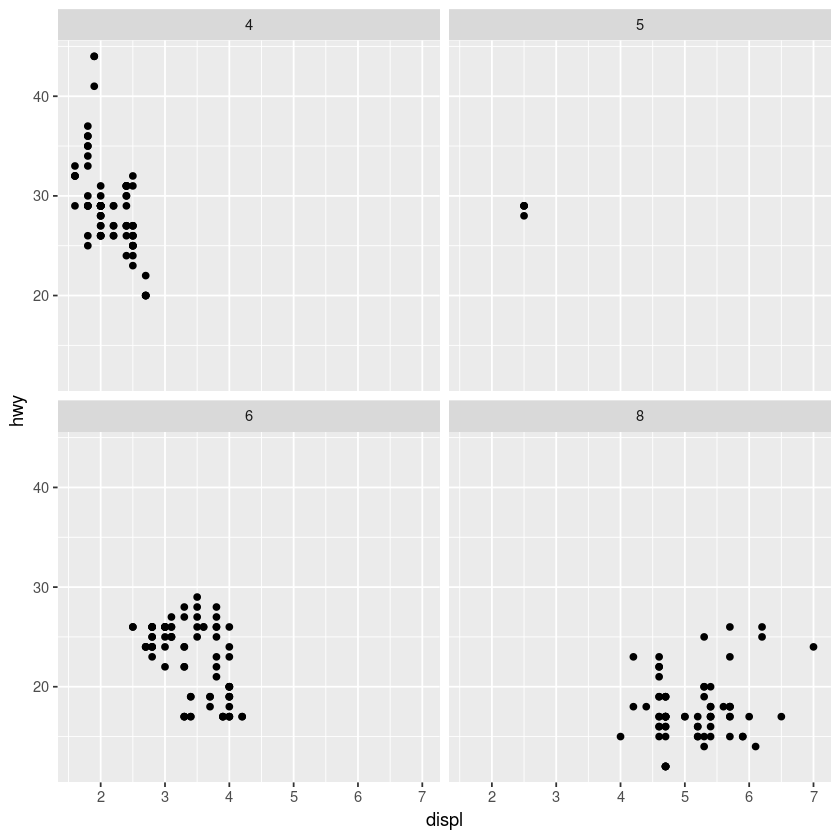

In [21]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy)) +
    facet_wrap(~ cyl, nrow = 2)

2. What do the empty cells in plot with facet_grid(drv ~ cyl) mean? How do they relate to this plot?

``` R

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = drv, y = cyl))

```

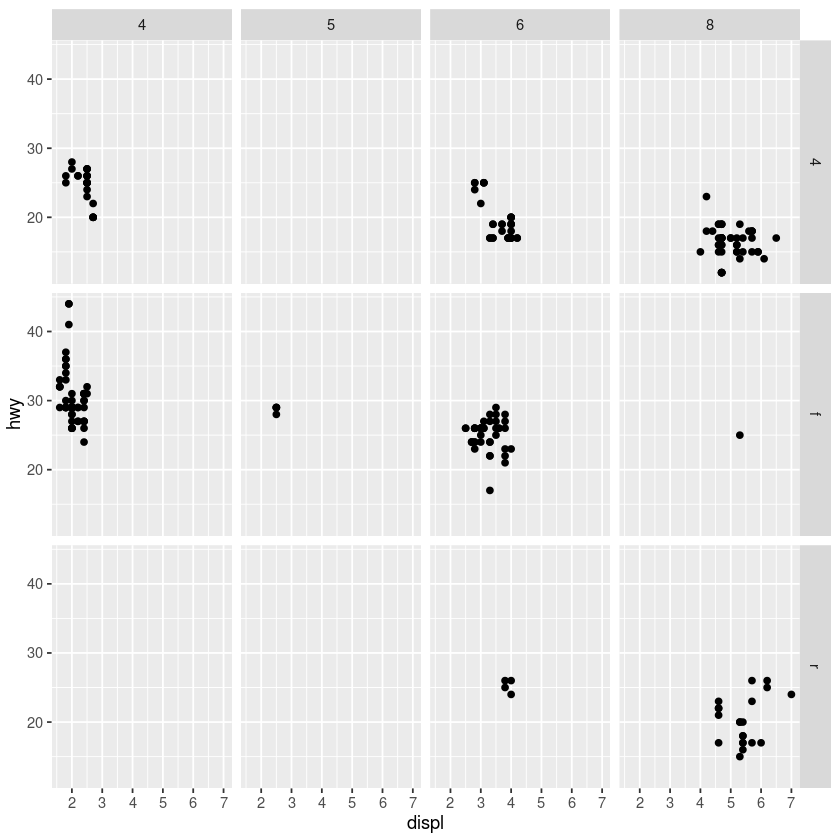

In [22]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy)) +
    facet_grid(drv ~ cyl)

This means that there were no data for cars for drv = r and cyl = 4,5

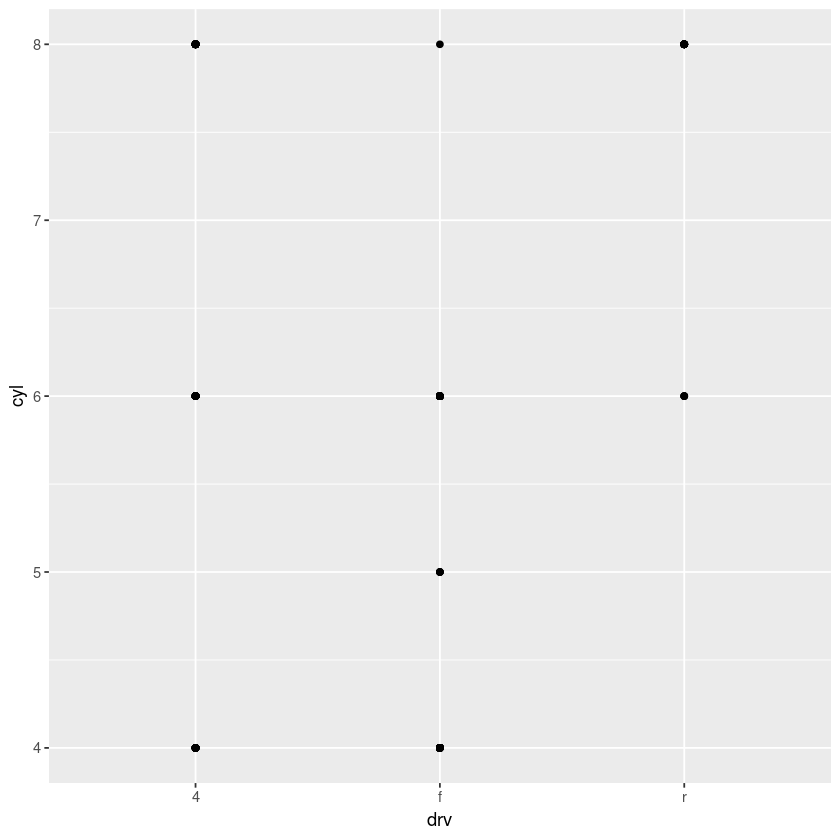

In [23]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = drv, y = cyl))

We confirm this from the above plot. There indeed are no cars with drv = r and cyl in (4, 5)

3. What plots does the following code make? What does . do?

``` R

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(drv ~ .)

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(. ~ cyl)

```

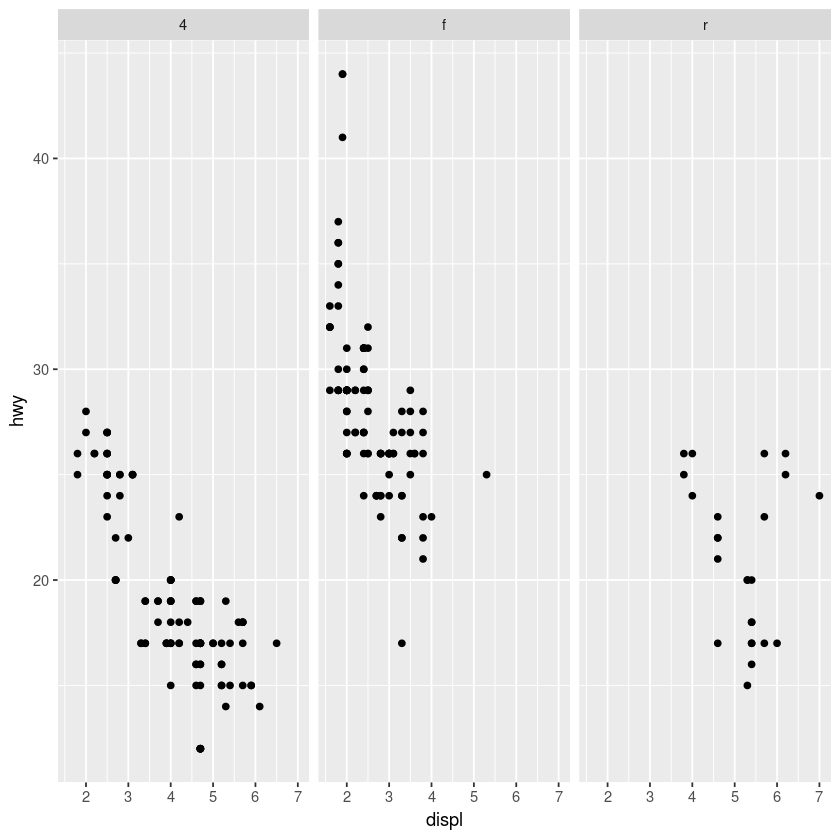

In [24]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(. ~ drv)

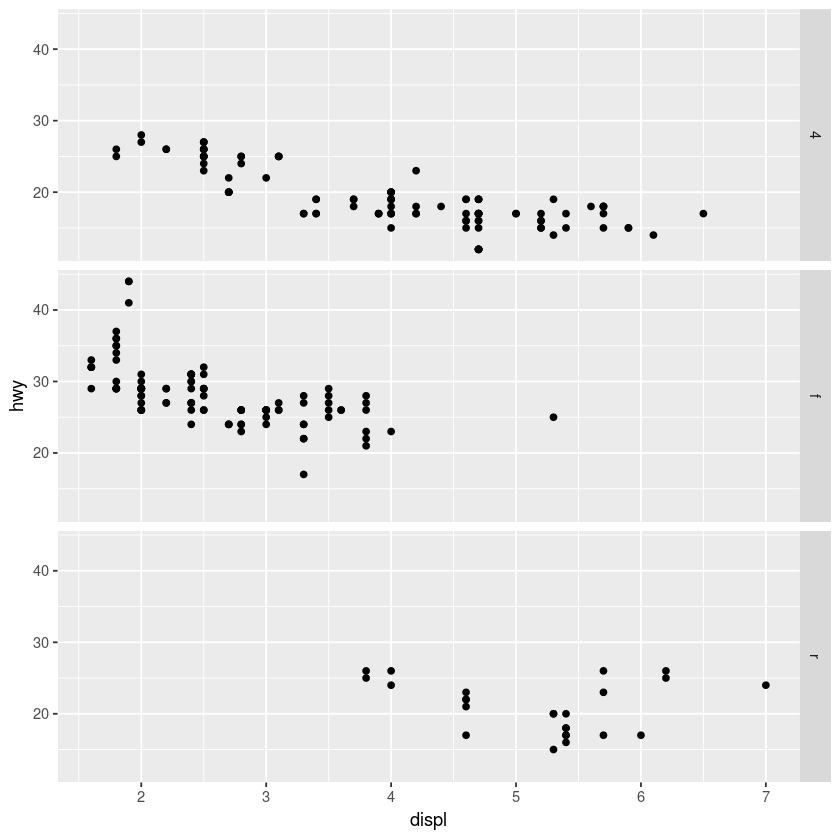

In [25]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(drv ~ .)

It just specifies whether we want the var to be aligned in rows or in cols

4. Take the first faceted plot in this section:

``` R

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class, nrow = 2)

```

What are the advantages to using faceting instead of the colour aesthetic? What are the disadvantages? How might the balance change if you had a larger dataset?



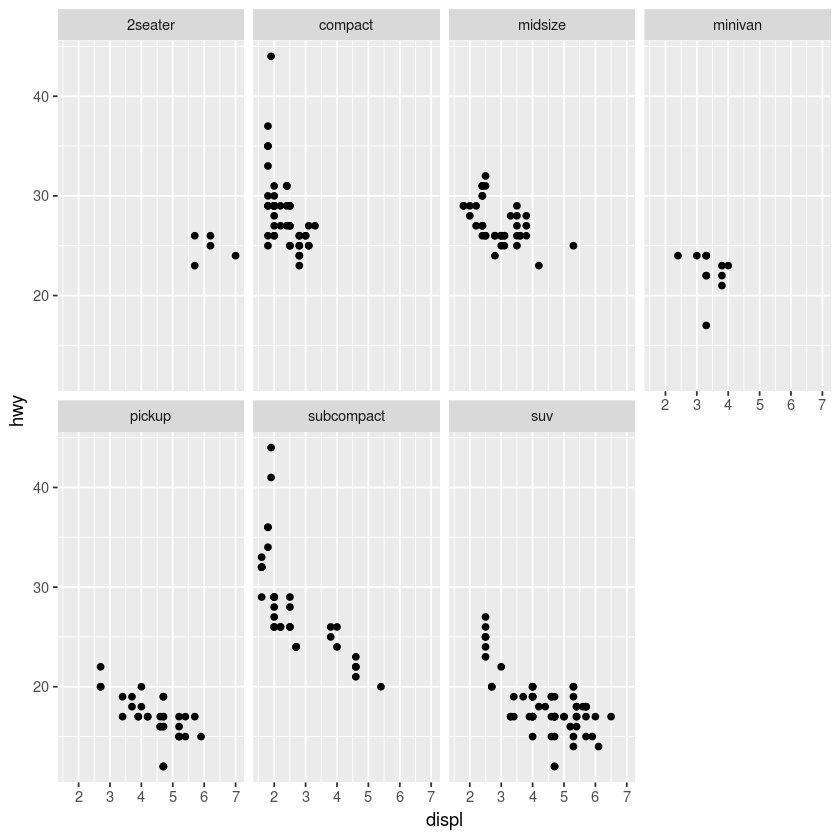

In [26]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class, nrow = 2)


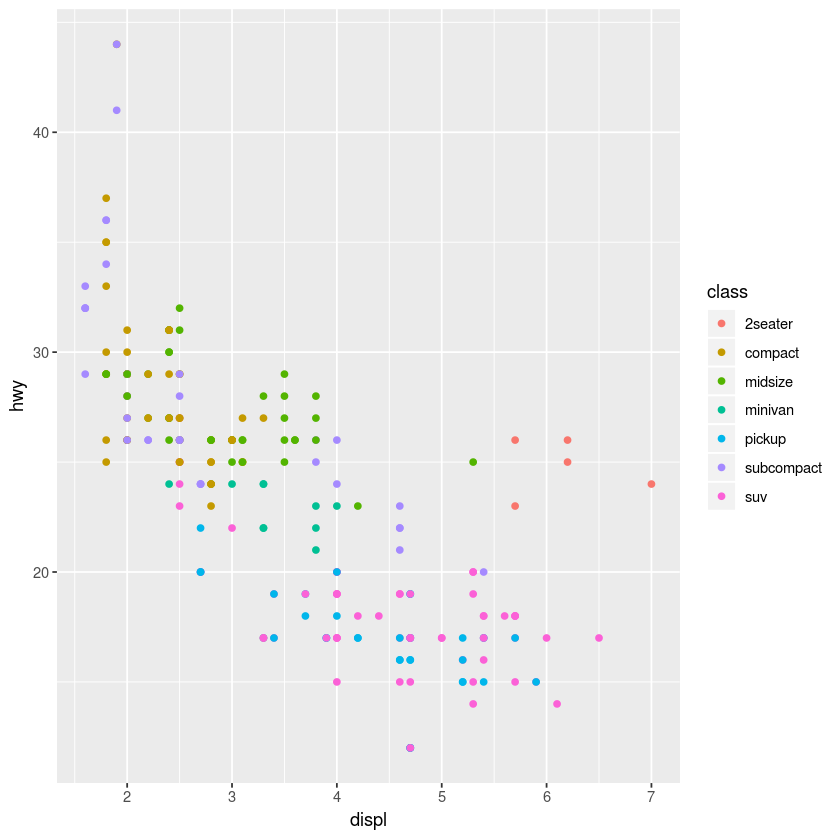

In [27]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class))


The color plot will be difficult for a colr blind person. If there are lots of categories, color gets mixed up

5. Read ?facet_wrap. What does nrow do? What does ncol do? What other options control the layout of the individual panels? Why doesn’t facet_grid() have nrow and ncol arguments?

``` R

# Use vars() to supply faceting variables:
p + facet_wrap(vars(class))

# Control the number of rows and columns with nrow and ncol
p + facet_wrap(vars(class), nrow = 4)

# You can facet by multiple variables
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  facet_wrap(vars(cyl, drv))

# Use the `labeller` option to control how labels are printed:
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  facet_wrap(c("cyl", "drv"), labeller = "label_both")



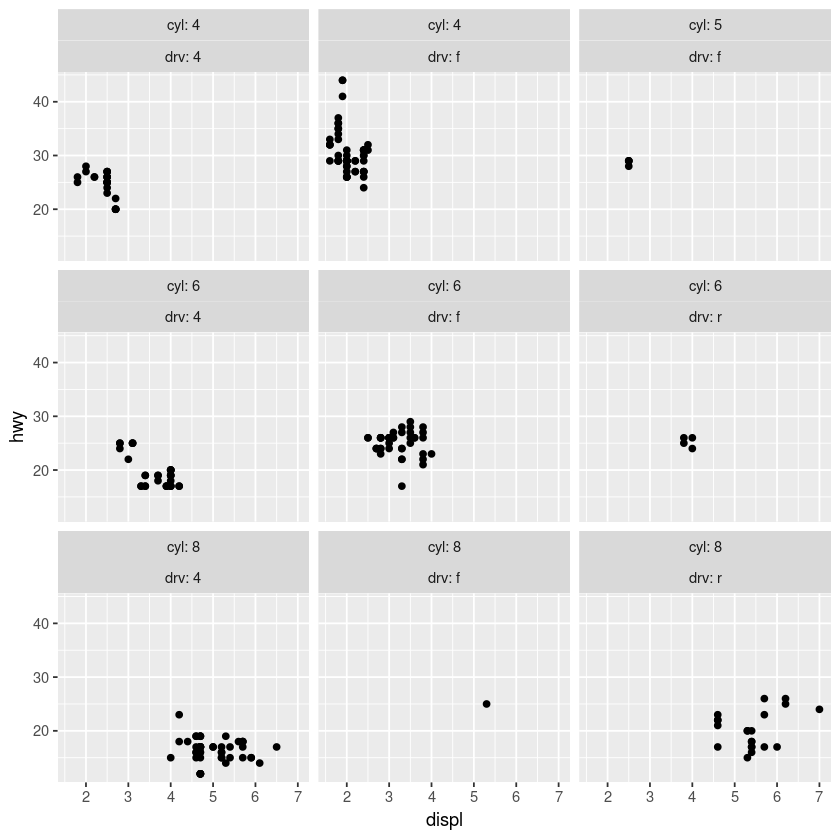

In [28]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  facet_wrap(c("cyl", "drv"), labeller = "label_both")

In [29]:
?facet_grid

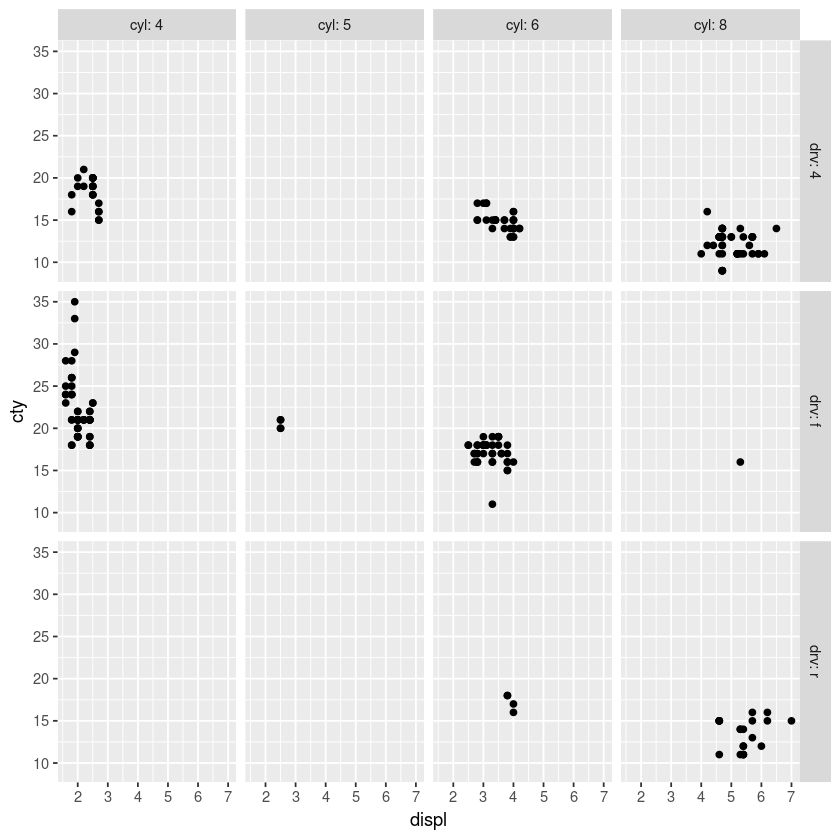

In [30]:
ggplot(mpg, aes(displ, cty)) + 
    geom_point() +
    facet_grid(rows = vars(drv), cols = vars(cyl), labeller = "label_both")


facet_grid() is a grid sys.. Here we dont specify how many rows and cols we want.. We just specify what vars to be plotted on the rows and cols

6. When using facet_grid() you should usually put the variable with more unique levels in the columns. Why?

Because most screens are wider than they are tall


### Geometric objects

How are these two plots similar?

![](https://r4ds.had.co.nz/visualize_files/figure-html/unnamed-chunk-18-1.png)

Both plots contain the same x variable, the same y variable, and both describe the same data. But the plots are not identical. Each plot uses a different visual object to represent the data. In ggplot2 syntax, we say that they use different geoms.

A geom is the geometrical object that a plot uses to represent data. People often describe plots by the type of geom that the plot uses. For example, bar charts use bar geoms, line charts use line geoms, boxplots use boxplot geoms, and so on. Scatterplots break the trend; they use the point geom. As we see above, you can use different geoms to plot the same data. The plot on the left uses the point geom, and the plot on the right uses the smooth geom, a smooth line fitted to the data.



`geom_smooth()` using method = 'loess' and formula 'y ~ x'


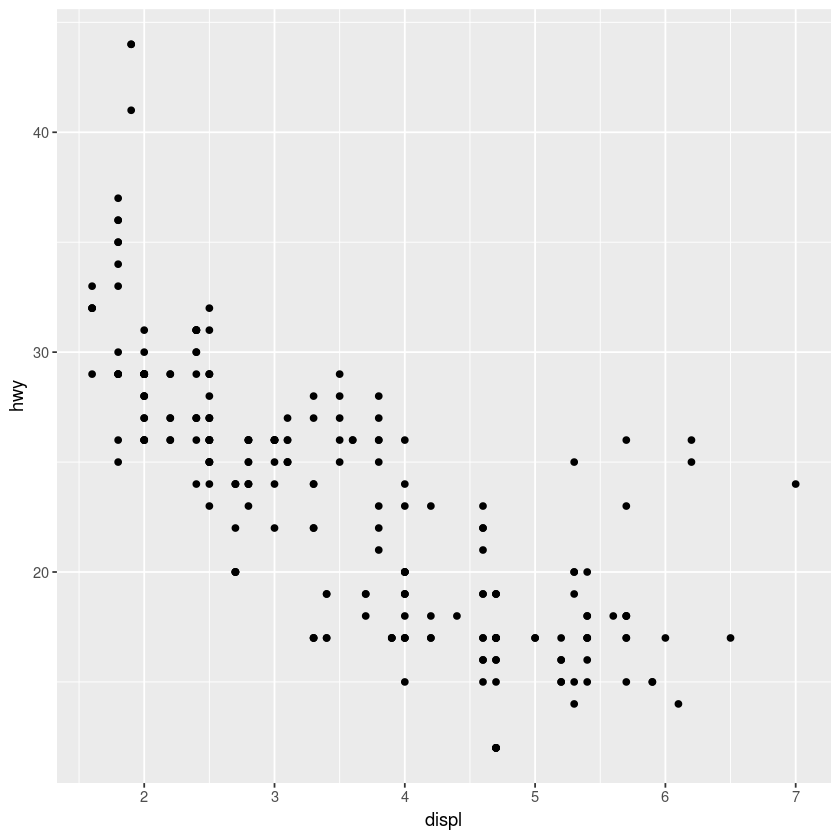

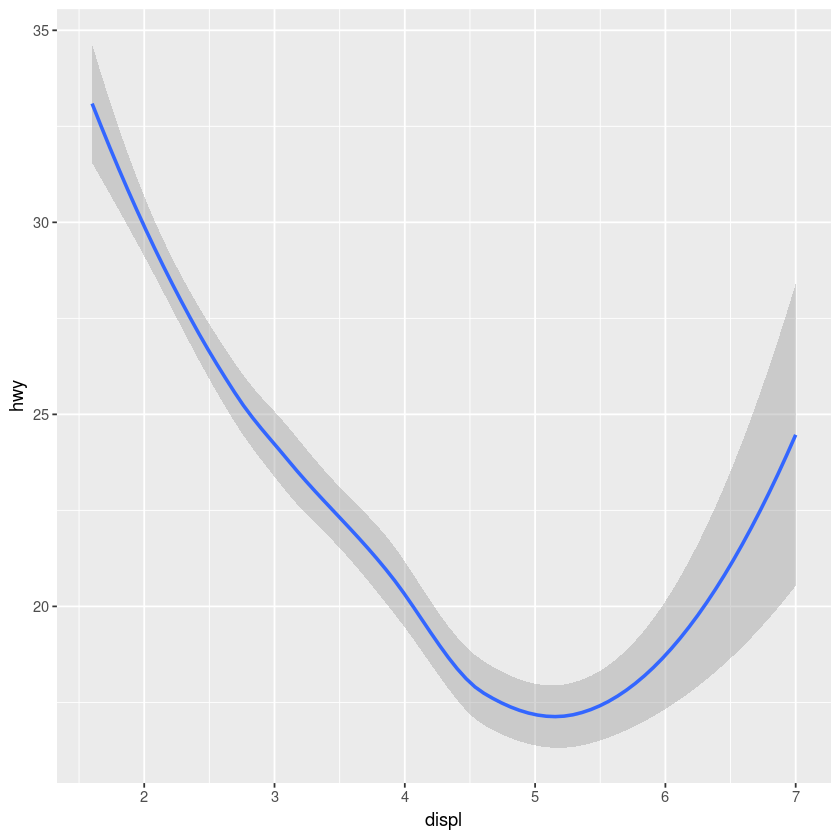

In [31]:
# left
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

# right
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy))

Every geom function in ggplot2 takes a mapping argument. However, not every aesthetic works with every geom. You could set the shape of a point, but you couldn’t set the “shape” of a line. On the other hand, you could set the linetype of a line. geom_smooth() will draw a different line, with a different linetype, for each unique value of the variable that you map to linetype.



`geom_smooth()` using method = 'loess' and formula 'y ~ x'


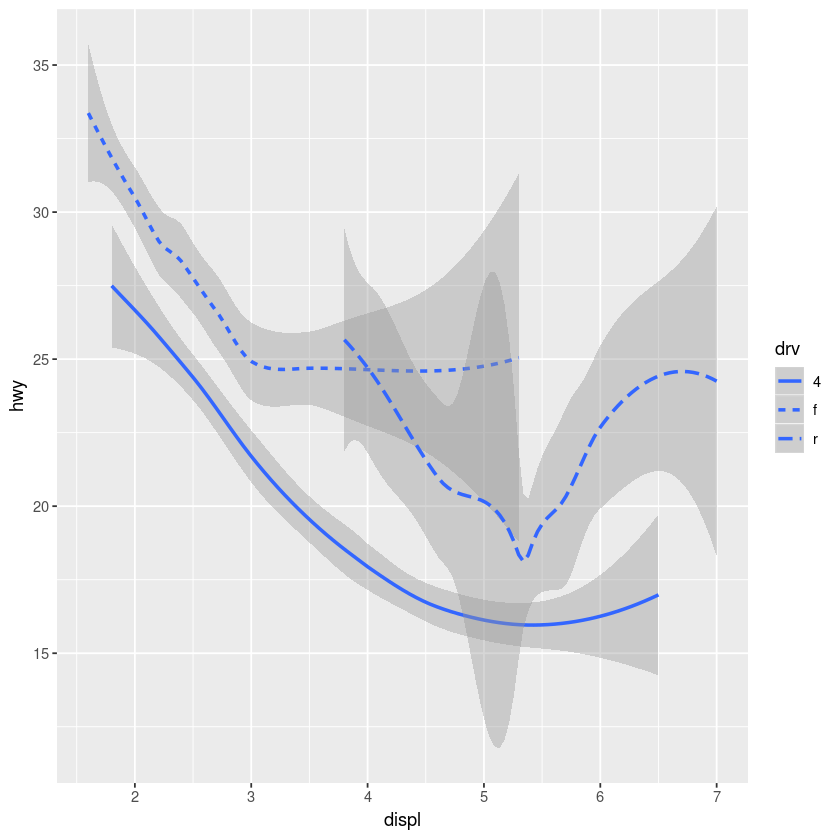

In [32]:
ggplot(data = mpg) +
    geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv))

Here geom_smooth() separates the cars into three lines based on their drv value, which describes a car’s drivetrain. One line describes all of the points with a 4 value, one line describes all of the points with an f value, and one line describes all of the points with an r value. Here, 4 stands for four-wheel drive, f for front-wheel drive, and r for rear-wheel drive.

If this sounds strange, we can make it more clear by overlaying the lines on top of the raw data and then coloring everything according to drv.



`geom_smooth()` using method = 'loess' and formula 'y ~ x'


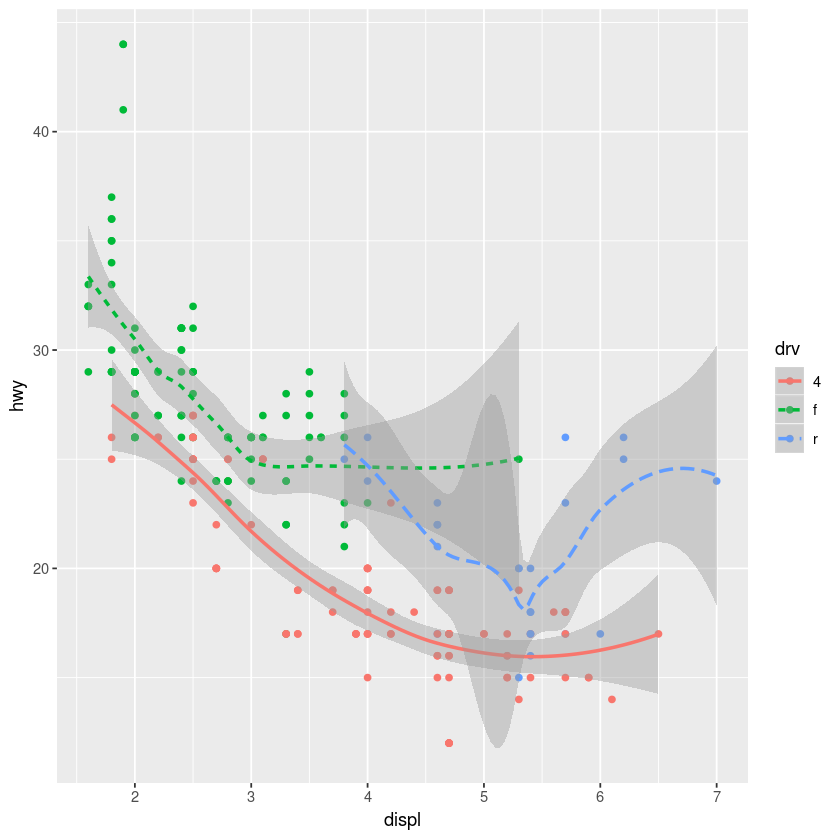

In [33]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, color = drv)) +
    geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv, color = drv))

Notice that this plot contains two geoms in the same graph! If this makes you excited, buckle up. We will learn how to place multiple geoms in the same plot very soon.

Many geoms, like geom_smooth(), use a single geometric object to display multiple rows of data. For these geoms, you can set the group aesthetic to a categorical variable to draw multiple objects. ggplot2 will draw a separate object for each unique value of the grouping variable. In practice, ggplot2 will automatically group the data for these geoms whenever you map an aesthetic to a discrete variable (as in the linetype example). It is convenient to rely on this feature because the group aesthetic by itself does not add a legend or distinguishing features to the geoms.



`geom_smooth()` using method = 'loess' and formula 'y ~ x'


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


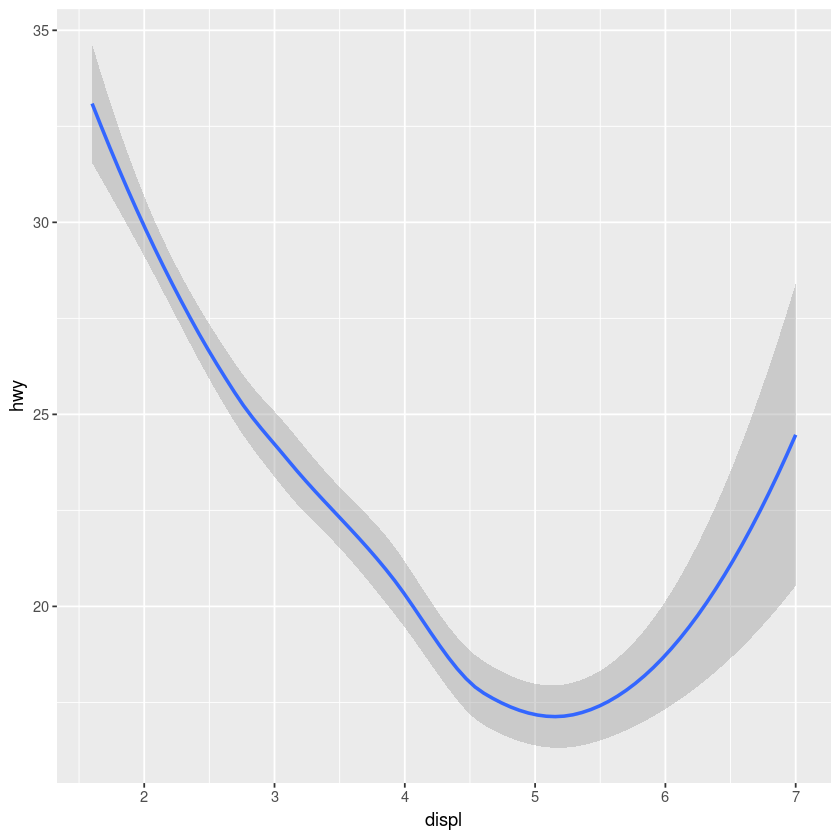

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


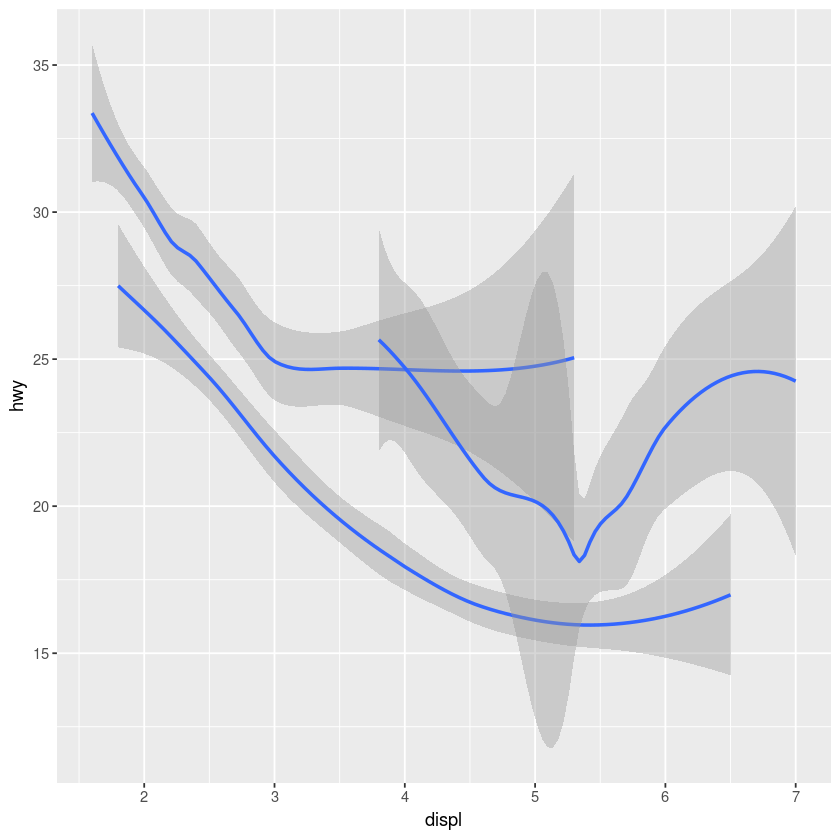

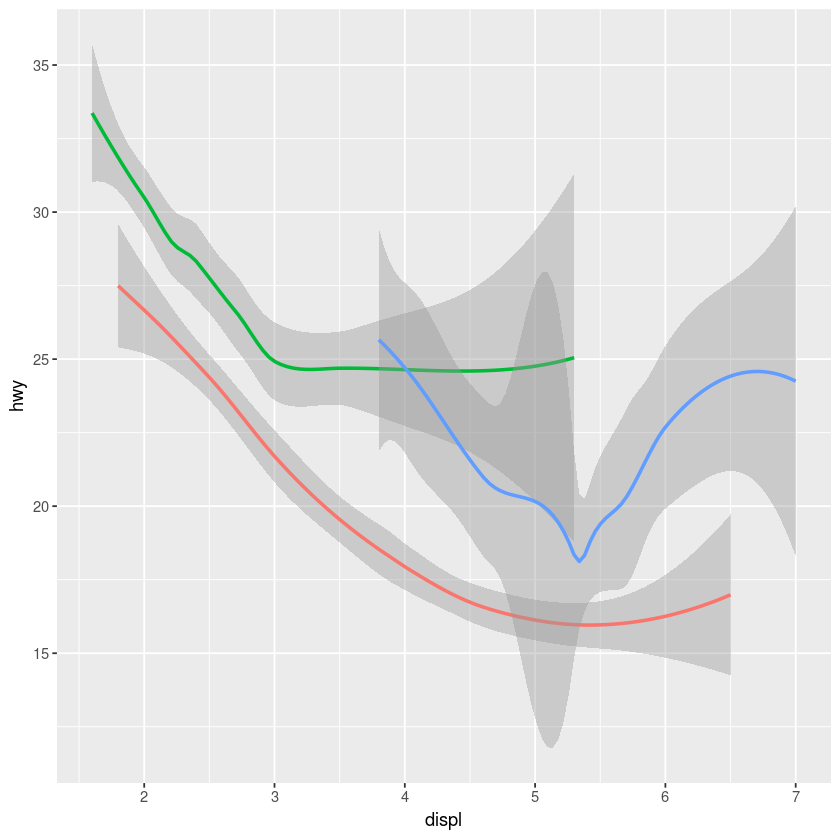

In [34]:
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy))
              
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy, group = drv))
    
ggplot(data = mpg) +
  geom_smooth(
    mapping = aes(x = displ, y = hwy, color = drv),
    show.legend = FALSE
  )

To display multiple geoms in the same plot, add multiple geom functions to ggplot():

``` R

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

```

This, however, introduces some duplication in our code. Imagine if you wanted to change the y-axis to display cty instead of hwy. You’d need to change the variable in two places, and you might forget to update one. You can avoid this type of repetition by passing a set of mappings to ggplot(). ggplot2 will treat these mappings as global mappings that apply to each geom in the graph. In other words, this code will produce the same plot as the previous code:

``` R

ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point() + 
  geom_smooth()

```

If you place mappings in a geom function, ggplot2 will treat them as local mappings for the layer. It will use these mappings to extend or overwrite the global mappings for that layer only. This makes it possible to display different aesthetics in different layers.



`geom_smooth()` using method = 'loess' and formula 'y ~ x'


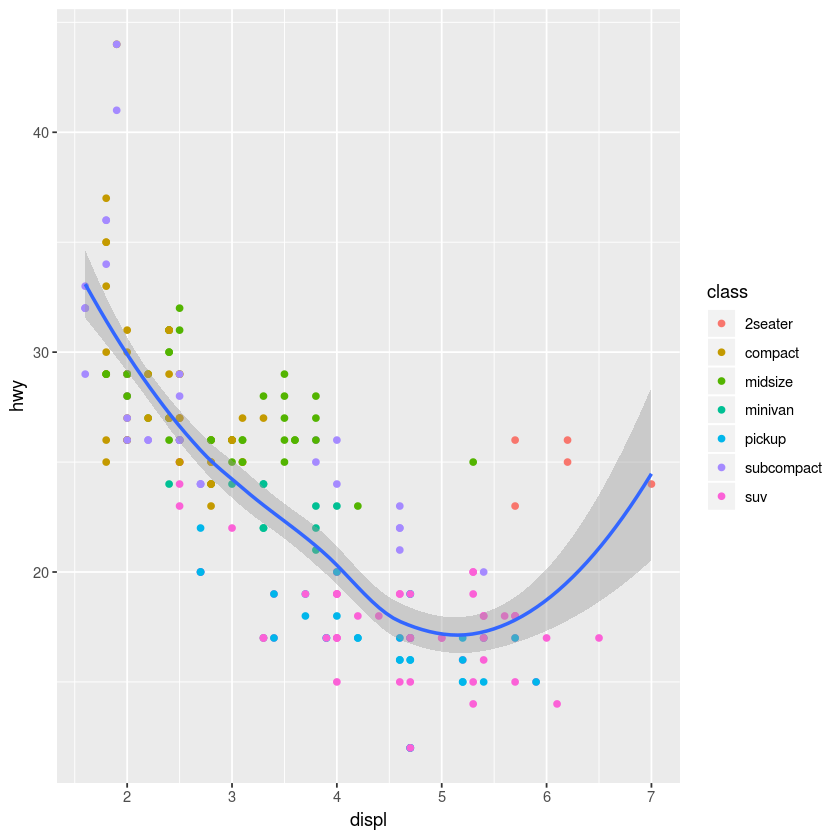

In [35]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
    geom_point(mapping = aes(color = class)) +
    geom_smooth()

You can use the same idea to specify different data for each layer. Here, our smooth line displays just a subset of the mpg dataset, the subcompact cars. The local data argument in geom_smooth() overrides the global data argument in ggplot() for that layer only.



`geom_smooth()` using method = 'loess' and formula 'y ~ x'


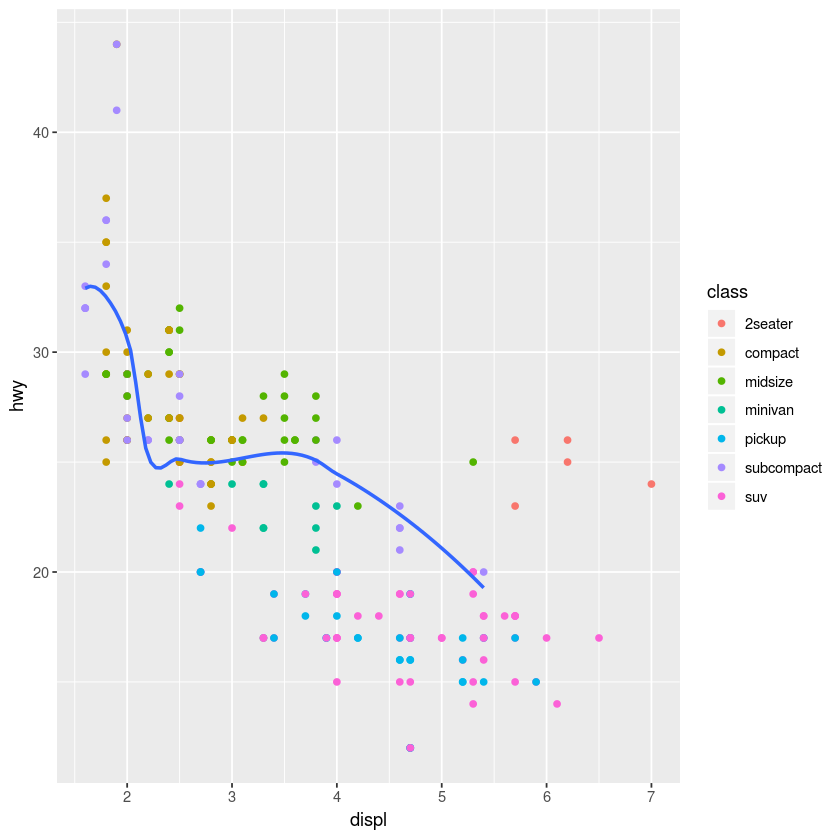

In [36]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
    geom_point(mapping = aes(color = class)) +
    geom_smooth(data = dplyr::filter(mpg, class == "subcompact"), se = FALSE)

# se: show confidence interval or not

### Exercises

1. What geom would you use to draw a line chart? A boxplot? A histogram? An area chart?



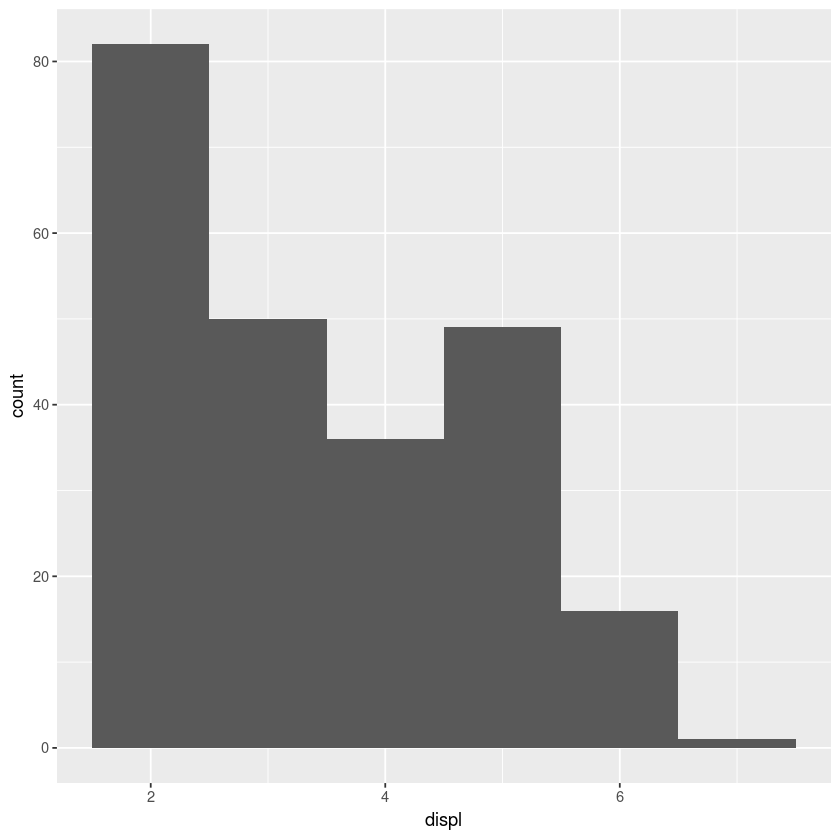

In [37]:
# histogram

ggplot(data = mpg) +
    geom_histogram(mapping = aes(displ), binwidth = 1)

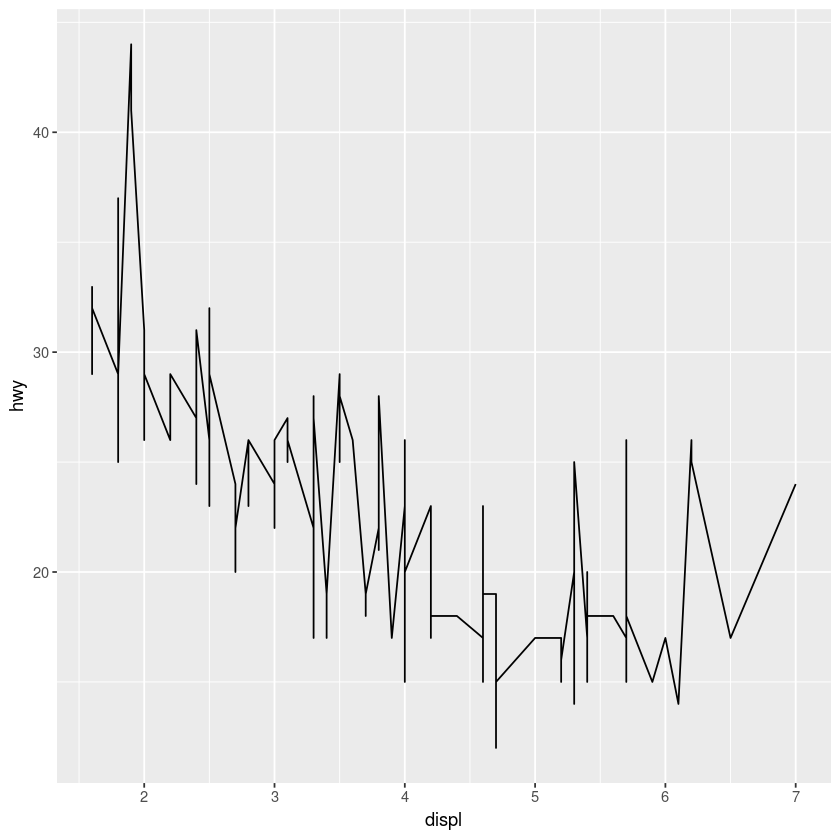

In [38]:
# line chart

ggplot(data = mpg) +
    geom_line(mapping = aes(x=displ, y = hwy)) 
    

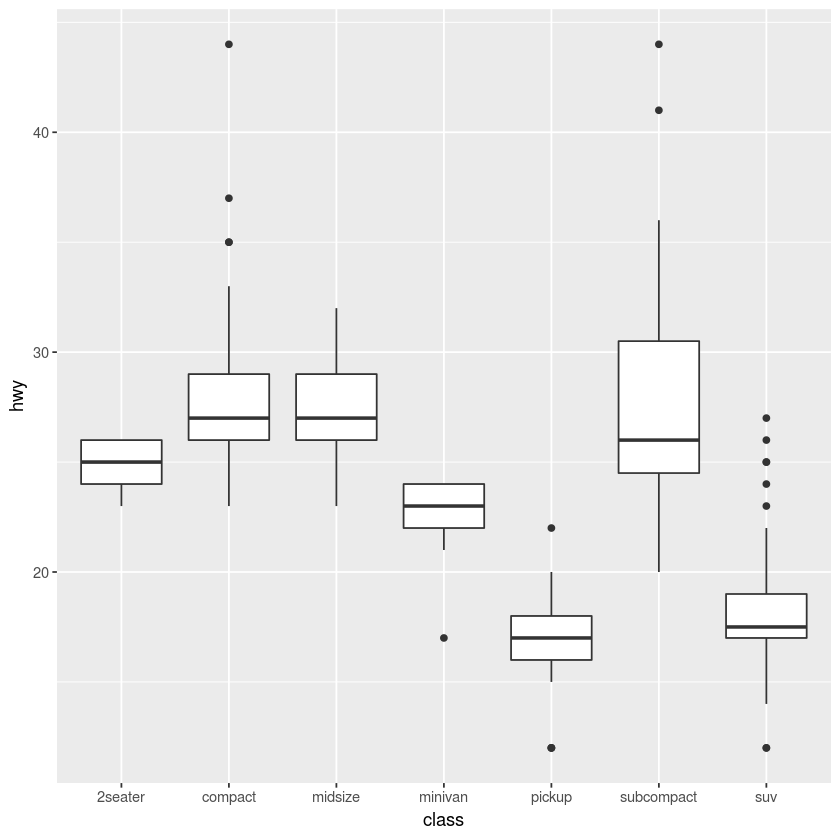

In [39]:
# boxplot

ggplot(data = mpg, mapping = aes(x=class, y=hwy)) +
    geom_boxplot()
    

In [40]:
set.seed(345)
Sector <- rep(c("S01","S02","S03","S04","S05","S06","S07"),times=7)
Year <- as.numeric(rep(c("1950","1960","1970","1980","1990","2000","2010"),each=7))
Value <- runif(49, 10, 100)
data <- data.frame(Sector,Year,Value)

head(data)

Sector,Year,Value
S01,1950,29.46283
S02,1950,34.72876
S03,1950,45.09326
S04,1950,69.01657
S05,1950,49.22797
S06,1950,82.31357


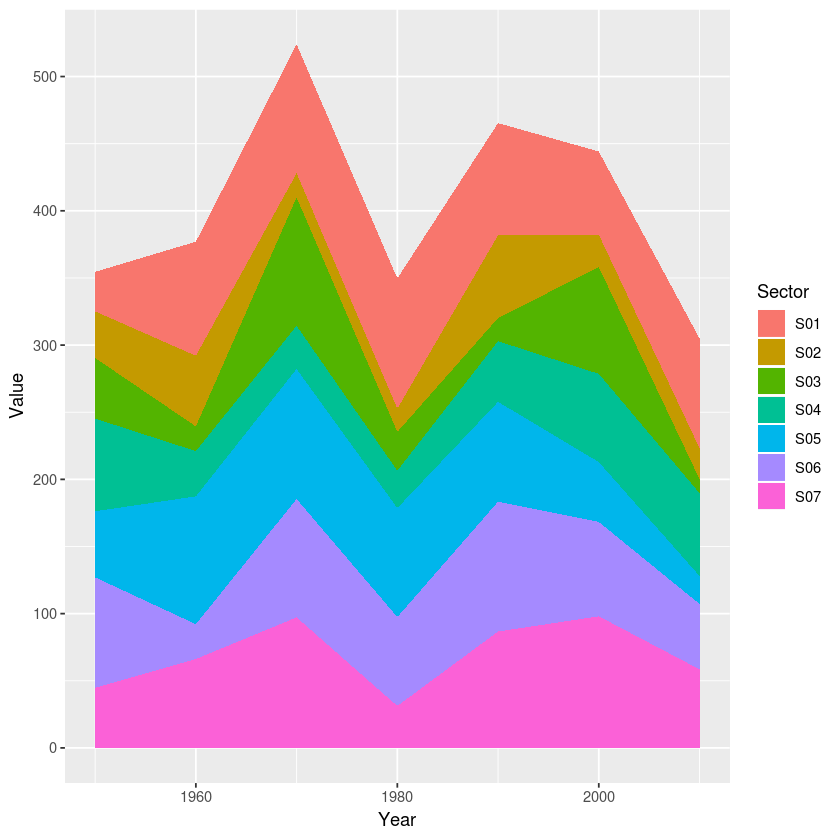

In [41]:

ggplot(data = data, aes(x=Year, y=Value, fill=Sector)) +
    geom_area()

 
2.Run this code in your head and predict what the output will look like. Then, run the code in R and check your predictions.

``` R

ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = drv)) + 
  geom_point() + 
  geom_smooth(se = FALSE)

```

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


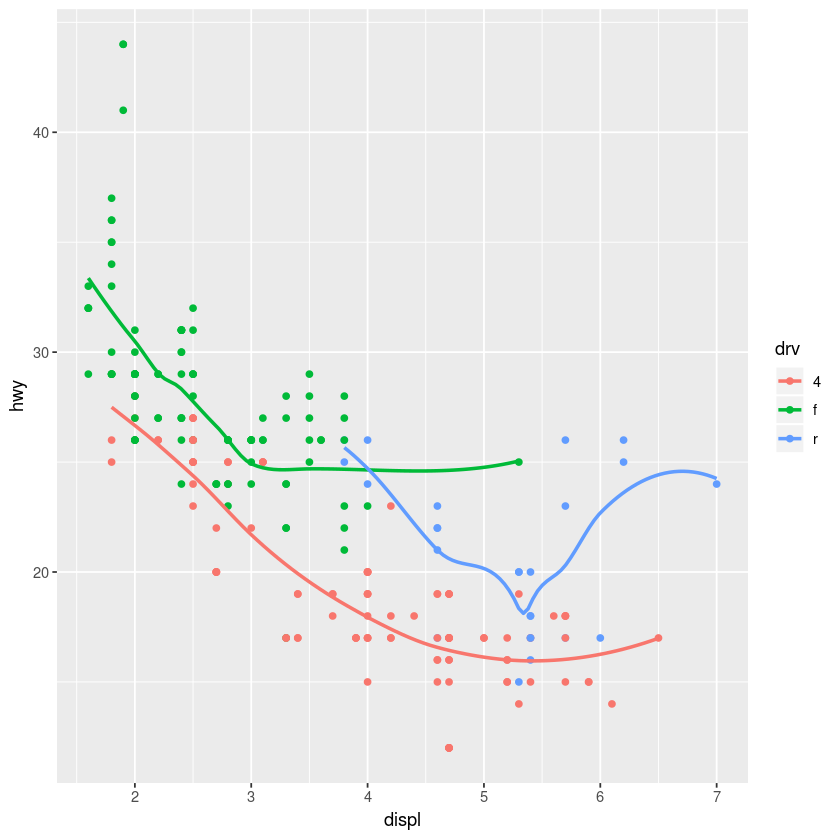

In [42]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = drv)) + 
  geom_point() + 
  geom_smooth(se = FALSE)

3.What does show.legend = FALSE do? What happens if you remove it?
Why do you think I used it earlier in the chapter?

4.What does the se argument to geom_smooth() do?

- its to set or unset confidence interval display


5. Will these two graphs look different? Why/why not?

``` R

ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point() + 
  geom_smooth()

ggplot() + 
  geom_point(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_smooth(data = mpg, mapping = aes(x = displ, y = hwy))

```

- Same 

6.Recreate the R code necessary to generate the following graphs.

![](https://r4ds.had.co.nz/visualize_files/figure-html/unnamed-chunk-29-1.png)
![](https://r4ds.had.co.nz/visualize_files/figure-html/unnamed-chunk-29-2.png)
![](https://r4ds.had.co.nz/visualize_files/figure-html/unnamed-chunk-29-3.png)
![](https://r4ds.had.co.nz/visualize_files/figure-html/unnamed-chunk-29-4.png)
![](https://r4ds.had.co.nz/visualize_files/figure-html/unnamed-chunk-29-5.png)
![](https://r4ds.had.co.nz/visualize_files/figure-html/unnamed-chunk-29-6.png)


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


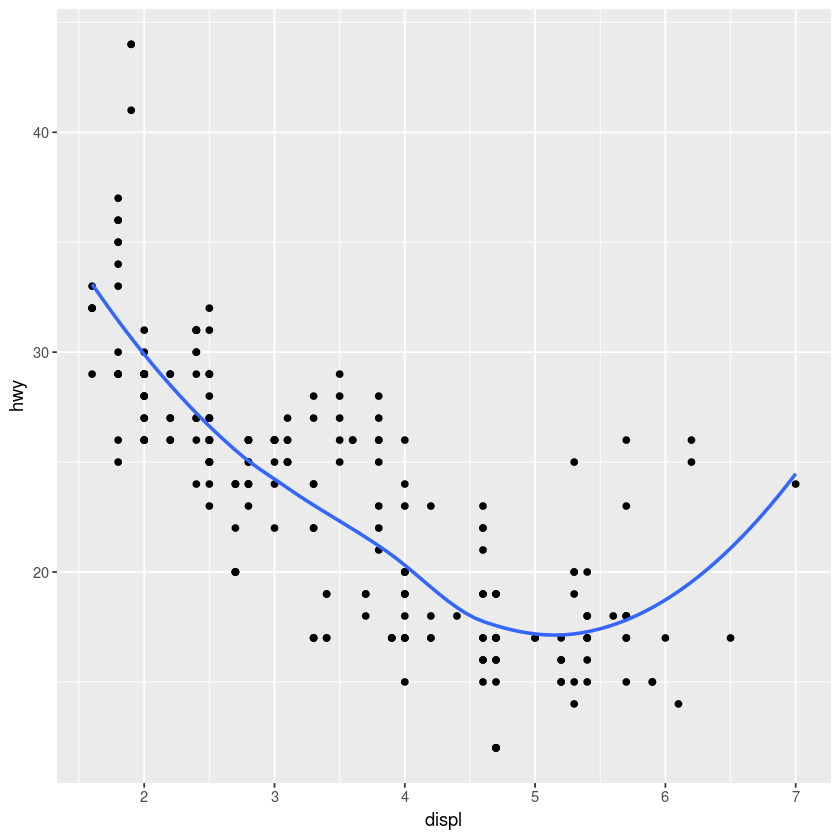

In [43]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
    geom_point() + 
    geom_smooth(se = FALSE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


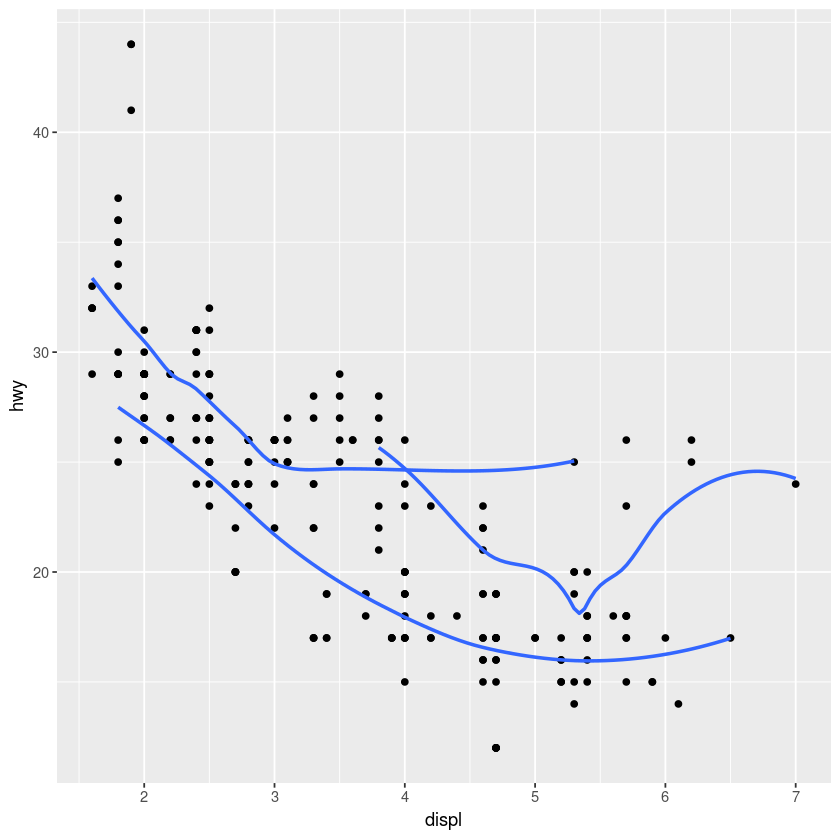

In [44]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy)) +
    geom_smooth(mapping = aes(x = displ, y = hwy, group = drv), se = FALSE)
    
    

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


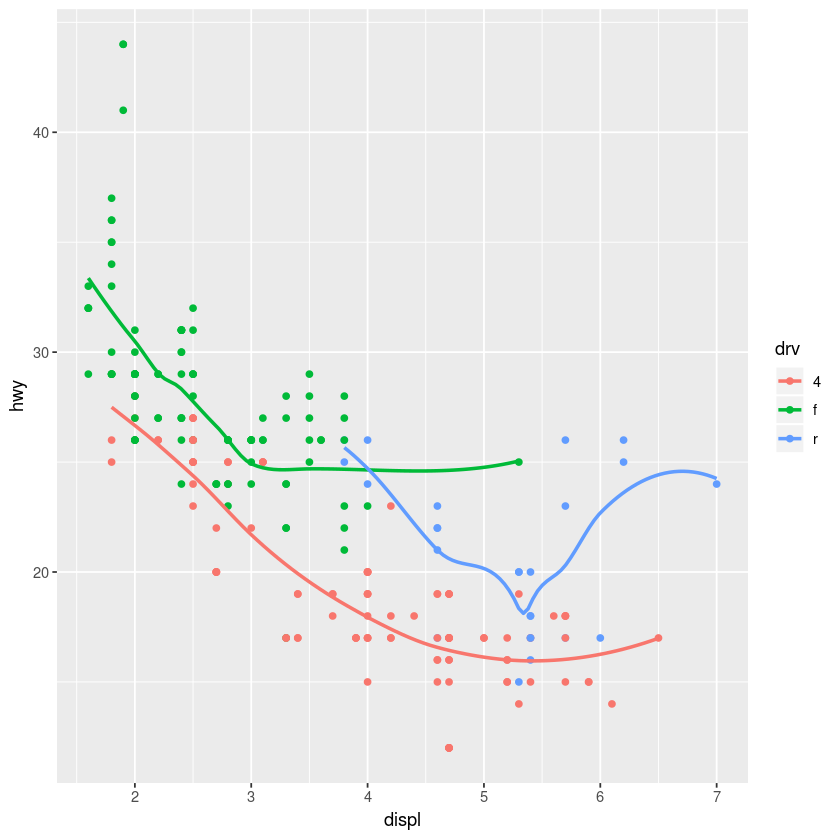

In [45]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, color = drv)) +
    geom_smooth(mapping = aes(x = displ, y = hwy,color = drv), se = FALSE)
    
    

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


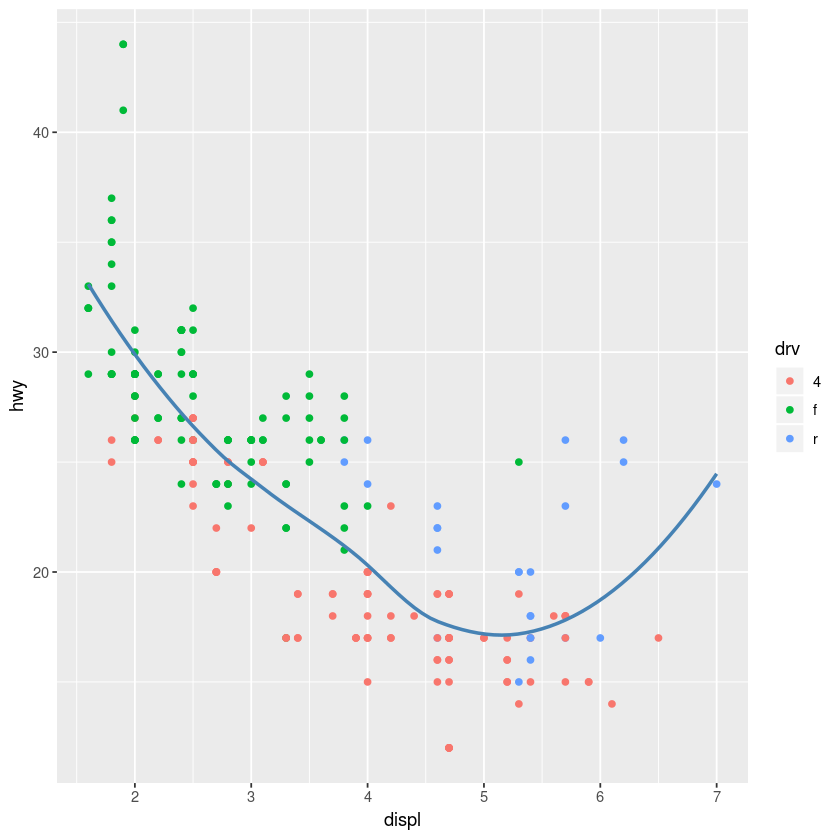

In [46]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, color = drv)) +
    geom_smooth(mapping = aes(x = displ, y = hwy), se = FALSE, color = "steelblue")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


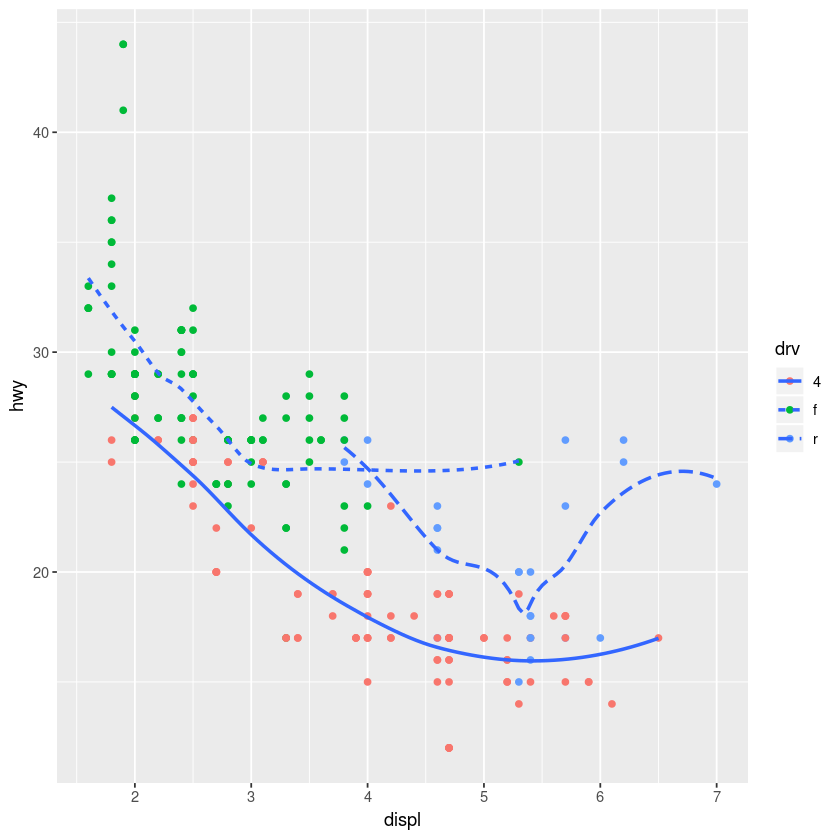

In [47]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, color = drv)) +
    geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv), se = FALSE)

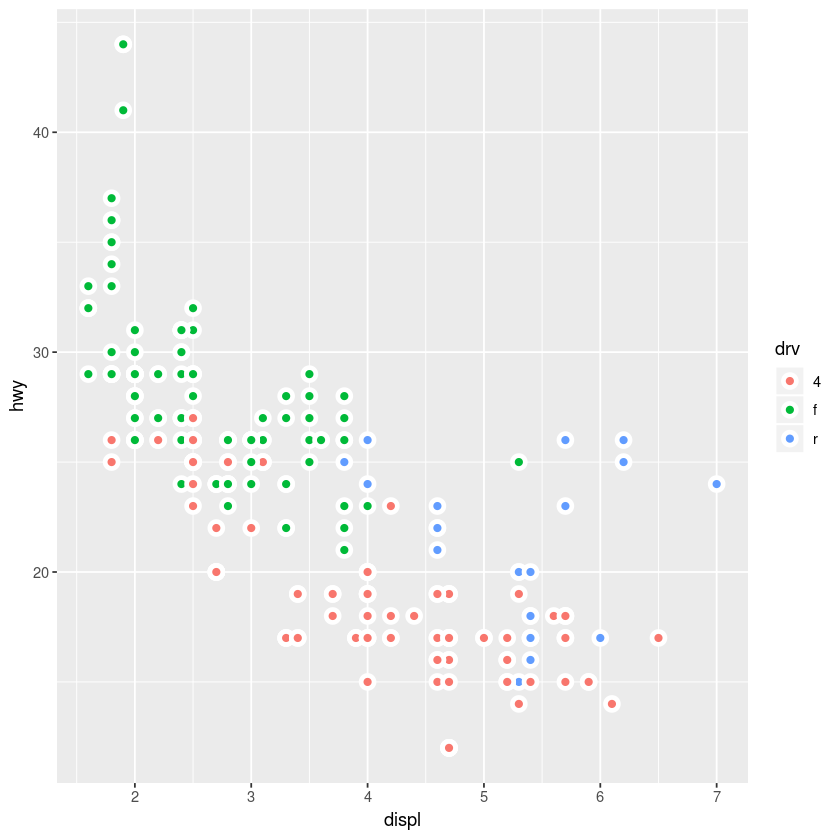

In [48]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, fill = drv), color = "white", shape = 21, stroke = 2, size = 2.3)
    

### Statistical transformations

Next, let’s take a look at a bar chart. Bar charts seem simple, but they are interesting because they reveal something subtle about plots. Consider a basic bar chart, as drawn with geom_bar(). The following chart displays the total number of diamonds in the diamonds dataset, grouped by cut. The diamonds dataset comes in ggplot2 and contains information about ~54,000 diamonds, including the price, carat, color, clarity, and cut of each diamond. The chart shows that more diamonds are available with high quality cuts than with low quality cuts.



In [49]:
?diamonds

In [50]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


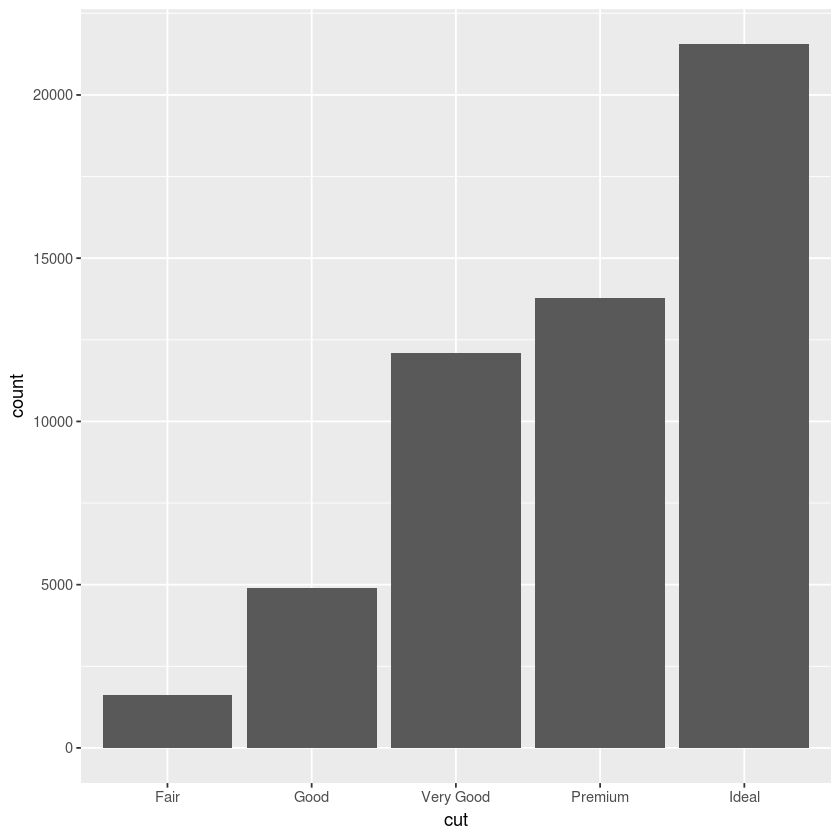

In [51]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut))

![](https://r4ds.had.co.nz/images/visualization-stat-bar.png)

You can learn which stat a geom uses by inspecting the default value for the stat argument. For example, ?geom_bar shows that the default value for stat is “count”, which means that geom_bar() uses stat_count(). stat_count() is documented on the same page as geom_bar(), and if you scroll down you can find a section called “Computed variables”. That describes how it computes two new variables: count and prop.

You can generally use geoms and stats interchangeably. For example, you can recreate the previous plot using stat_count() instead of geom_bar():

In [52]:
?geom_bar

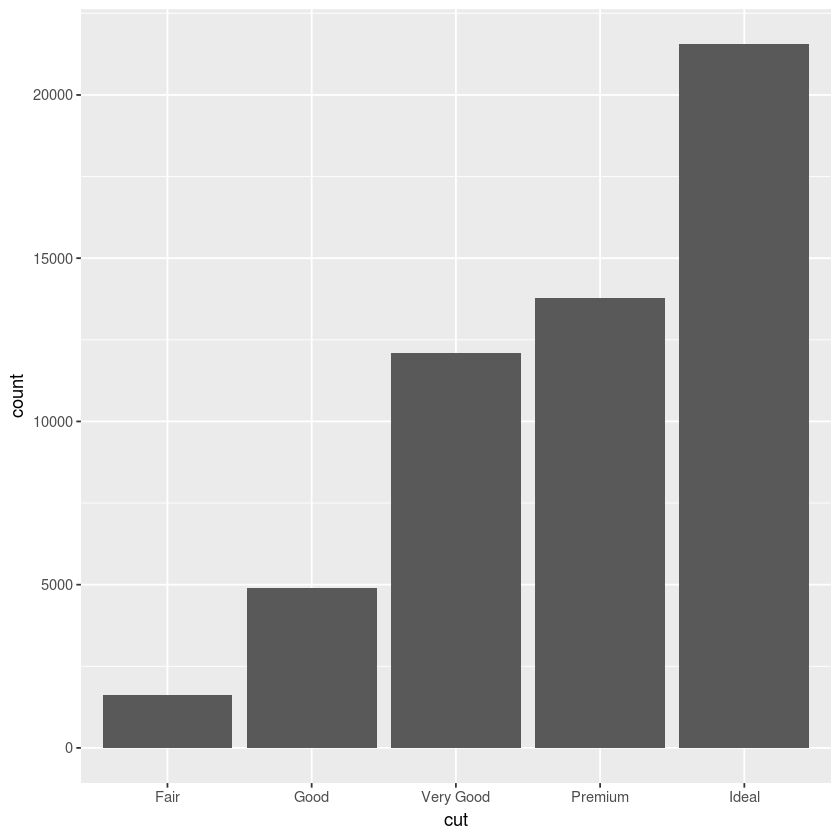

In [53]:
ggplot(data = diamonds) + 
  stat_count(mapping = aes(x = cut))

This works because every geom has a default stat; and every stat has a default geom. This means that you can typically use geoms without worrying about the underlying statistical transformation. There are three reasons you might need to use a stat explicitly:

1. You might want to override the default stat. In the code below, I change the stat of geom_bar() from count (the default) to identity. This lets me map the height of the bars to the raw values of a  
y variable. Unfortunately when people talk about bar charts casually, they might be referring to this type of bar chart, where the height of the bar is already present in the data, or the previous bar chart where the height of the bar is generated by counting rows.

``` R

demo <- tribble(
  ~cut,         ~freq,
  "Fair",       1610,
  "Good",       4906,
  "Very Good",  12082,
  "Premium",    13791,
  "Ideal",      21551
)

ggplot(data = demo) +
  geom_bar(mapping = aes(x = cut, y = freq), stat = "identity")

```

2. You might want to override the default mapping from transformed variables to aesthetics. For example, you might want to display a bar chart of proportion, rather than count:

``` R

ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, y = ..prop.., group = 1))

```

3. You might want to draw greater attention to the statistical transformation in your code. For example, you might use stat_summary(), which summarises the y values for each unique x value, to draw attention to the summary that you’re computing:

``` R

ggplot(data = diamonds) + 
  stat_summary(
    mapping = aes(x = cut, y = depth),
    fun.ymin = min,
    fun.ymax = max,
    fun.y = median
  )

```

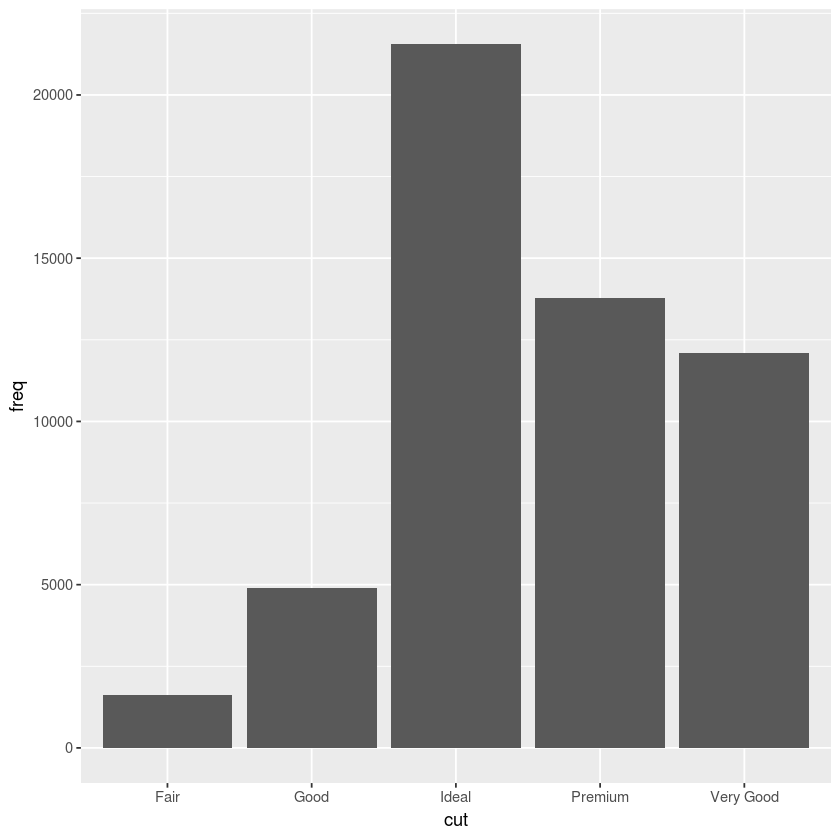

In [54]:
demo <- tribble(
  ~cut,         ~freq,
  "Fair",       1610,
  "Good",       4906,
  "Very Good",  12082,
  "Premium",    13791,
  "Ideal",      21551
)

ggplot(data = demo) +
    geom_bar(mapping = aes(x = cut, y = freq), stat = "identity")

# stat = identity specifies that we want to map the x values with specific y values

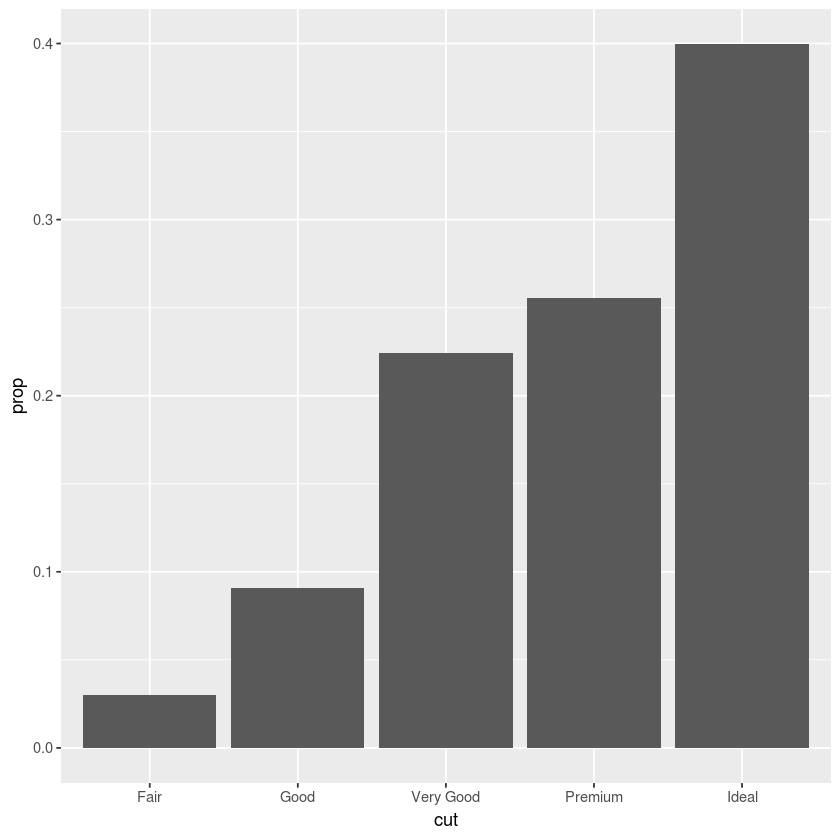

In [55]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, y = ..prop.., group = 1))

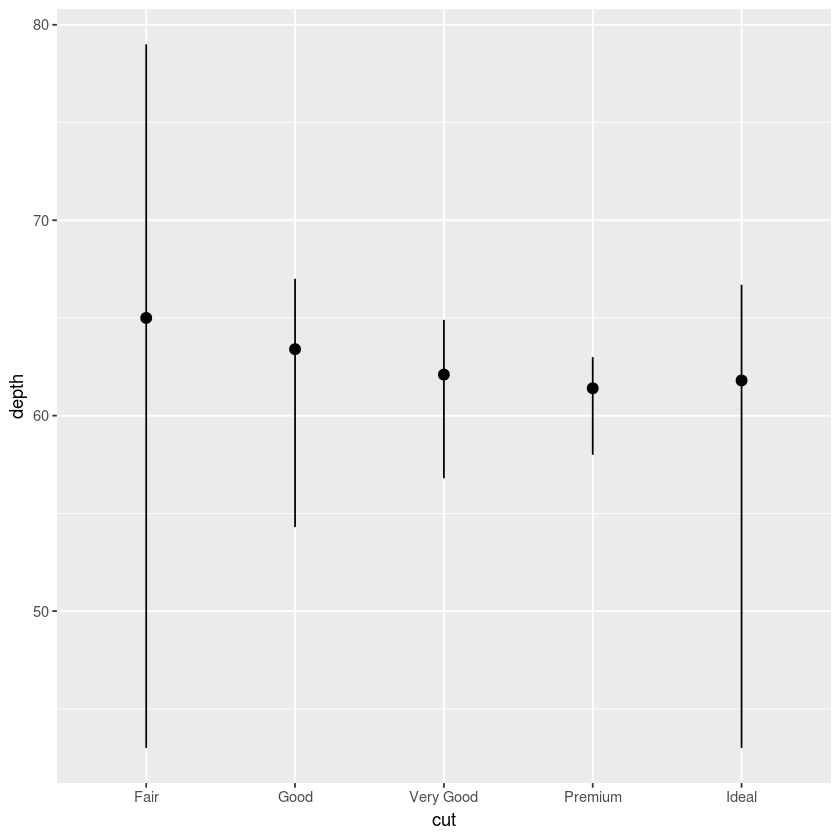

In [56]:
ggplot(data = diamonds) +
    stat_summary(
        mapping = aes(x = cut, y = depth),
        fun.ymin = min,
        fun.ymax = max,
        fun.y = median
    )

ggplot2 provides over 20 stats for you to use. Each stat is a function, so you can get help in the usual way, e.g. ?stat_bin. To see a complete list of stats, try the ggplot2 cheatsheet.

### Exercises

What is the default geom associated with stat_summary()? How could you rewrite the previous plot to use that geom function instead of the stat function?

- pointrange

``` R

ggplot(data = diamonds) +
    stat_summary(
        geom = "pointrange",
        mapping = aes(x = cut, y = depth),
        fun.ymin = min,
        fun.ymax = max,
        fun.y = median
    )

```

What does geom_col() do? How is it different to geom_bar()?

- There are two types of bar charts: geom_bar() and geom_col(). geom_bar() makes the height of the bar proportional to the number of cases in each group (or if the weight aesthetic is supplied, the sum of the weights). If you want the heights of the bars to represent values in the data, use geom_col() instead.

What variables does stat_smooth() compute? What parameters control its behaviour?


- Aids the eye in seeing patterns in the presence of overplotting. geom_smooth() and stat_smooth() are effectively aliases: they both use the same arguments. Use stat_smooth() if you want to display the results with a non-standard geom.

In our proportion bar chart, we need to set group = 1. Why? In other words what is the problem with these two graphs?

[solution](https://stackoverflow.com/questions/39878813/ggplot-geom-bar-meaning-of-aesgroup-1)

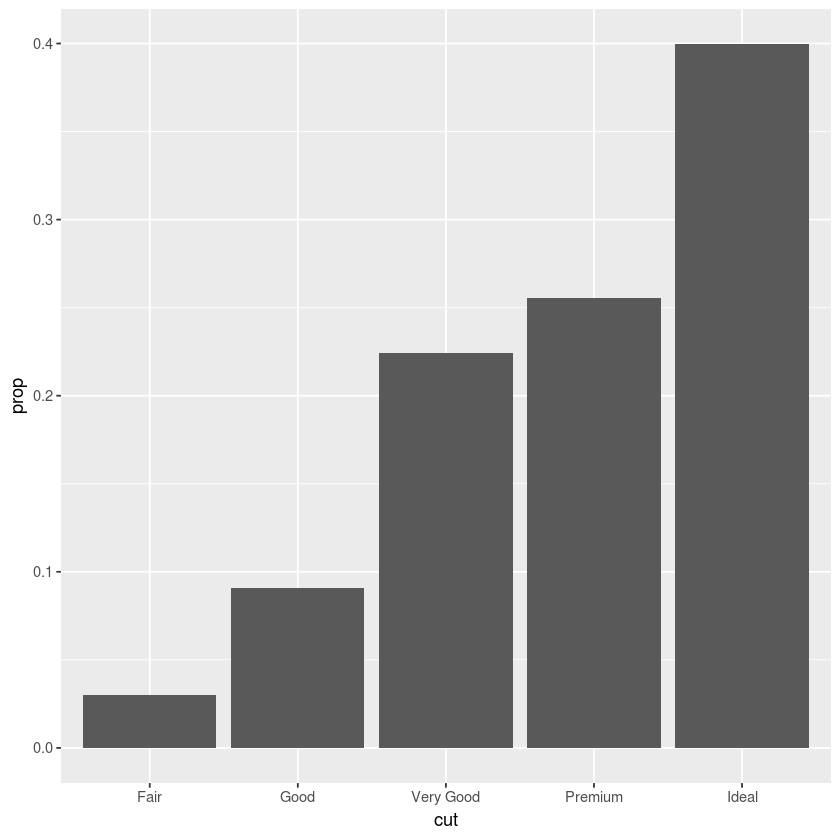

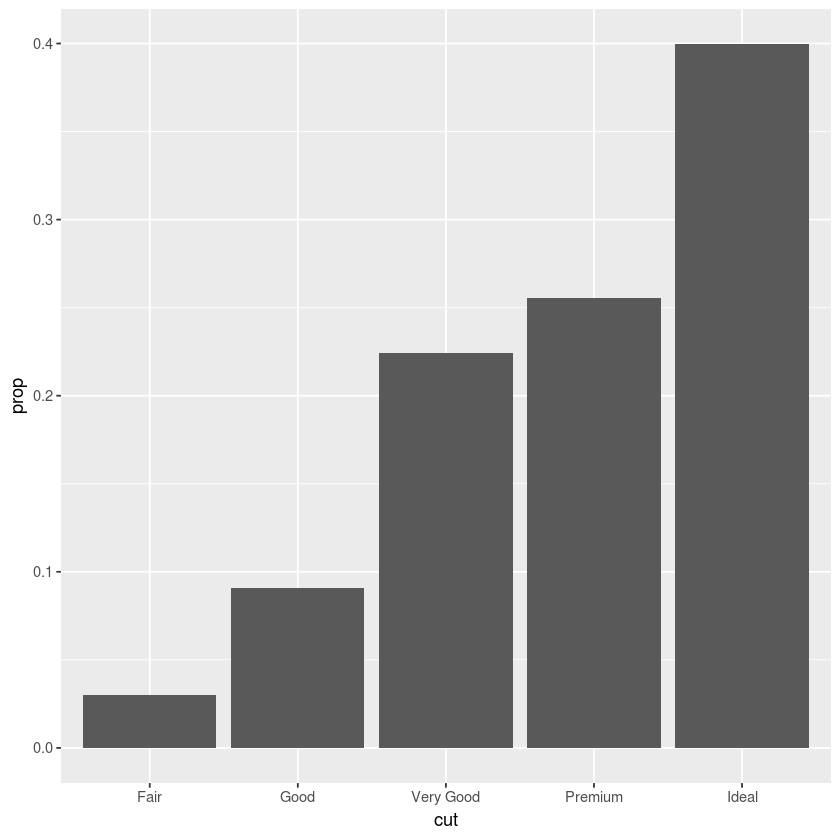

In [57]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, y = ..prop.., group = 1))
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = color, y = ..prop.., group = 1))

### Position adjustments

There’s one more piece of magic associated with bar charts. You can colour a bar chart using either the colour aesthetic, or, more usefully, fill:


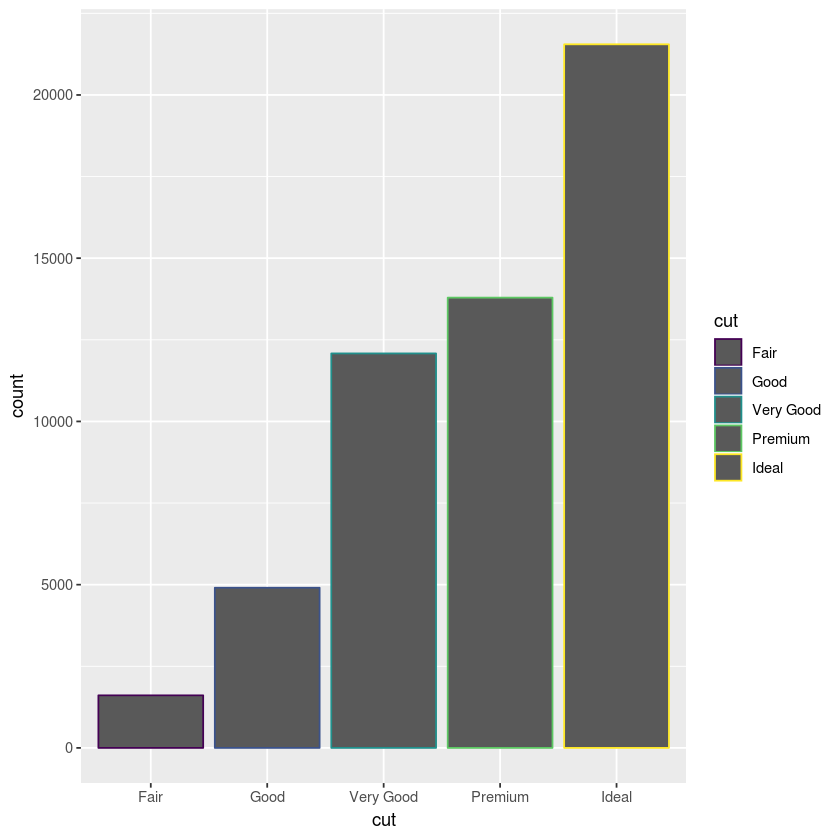

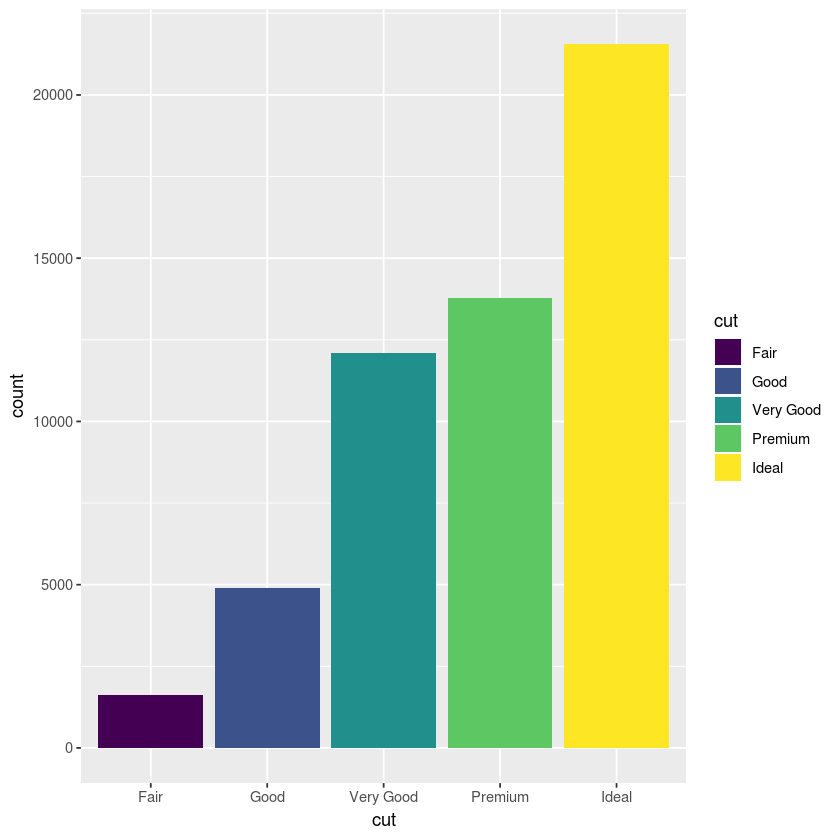

In [58]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, colour = cut))
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = cut))

Note what happens if you map the fill aesthetic to another variable, like clarity: the bars are automatically stacked. Each colored rectangle represents a combination of cut and clarity.



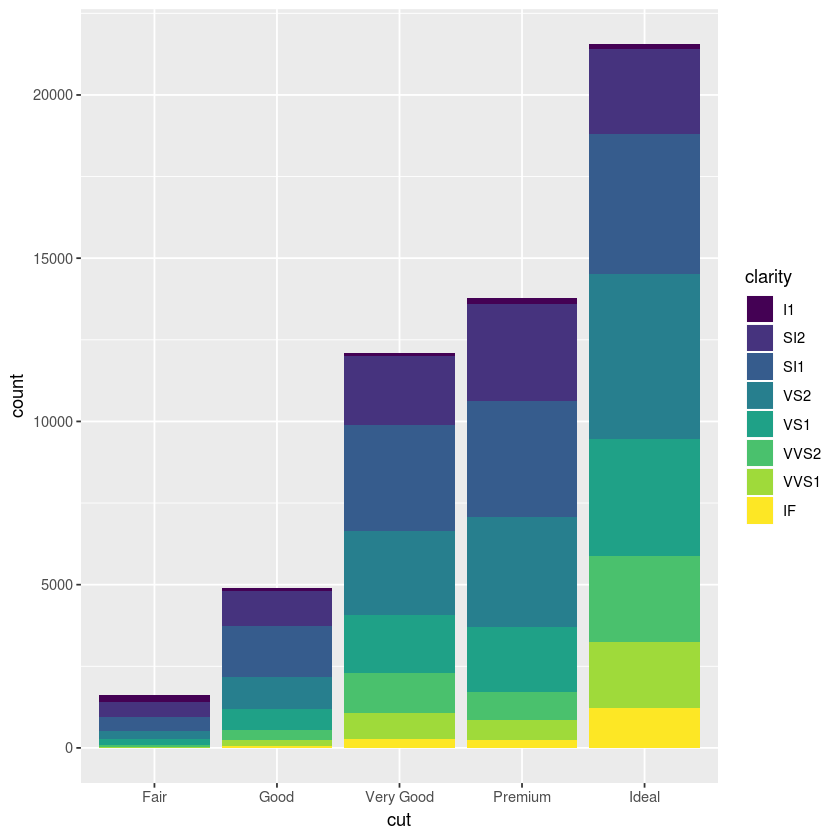

In [59]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = clarity), position = "stack")

# position = "stack" is the default arg

The stacking is performed automatically by the position adjustment specified by the position argument. If you don’t want a stacked bar chart, you can use one of three other options: "identity", "dodge" or "fill".

- position = "fill" works like stacking, but makes each set of stacked bars the same height. **This makes it easier to compare proportions across groups.**



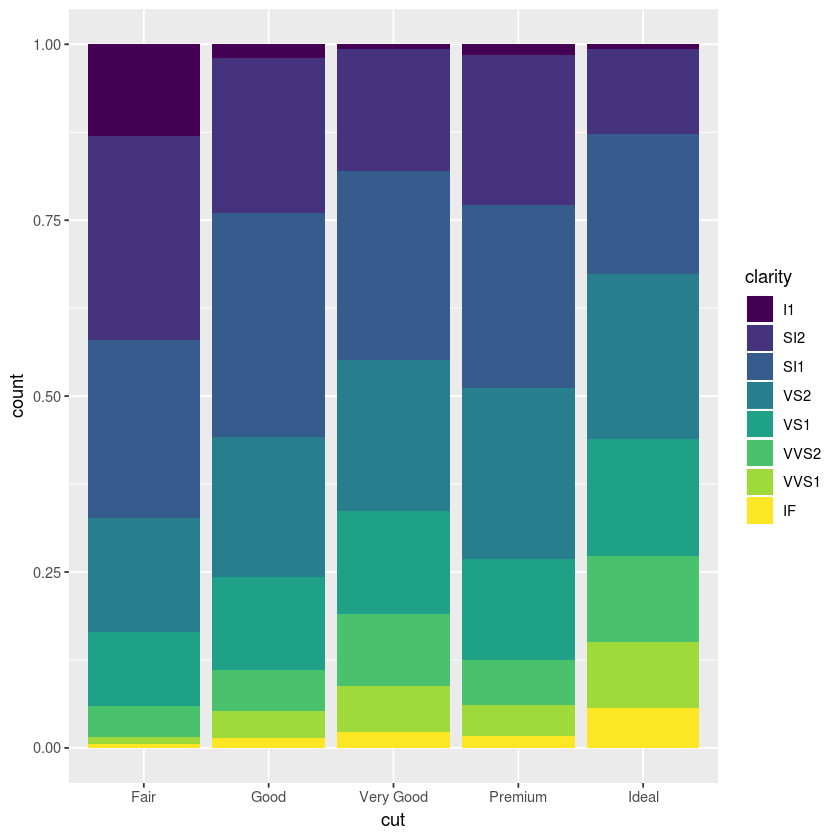

In [60]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")



- position = "dodge" places overlapping objects directly beside one another. **This makes it easier to compare individual values.**



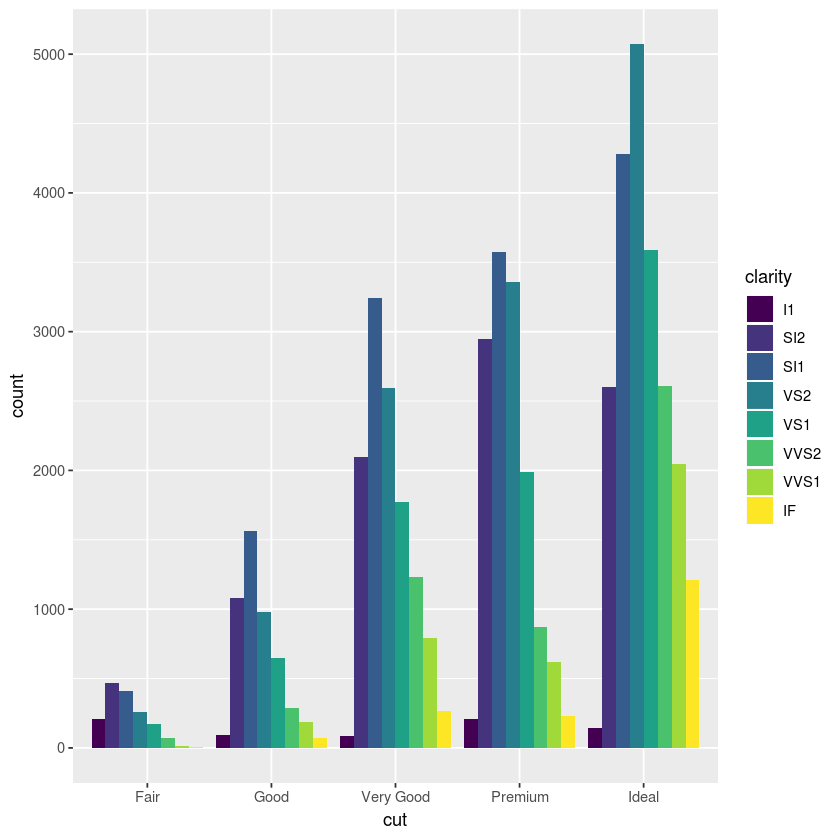

In [61]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")

There’s one other type of adjustment that’s not useful for bar charts, but it can be very useful for scatterplots. Recall our first scatterplot. Did you notice that the plot displays only 126 points, even though there are 234 observations in the dataset?



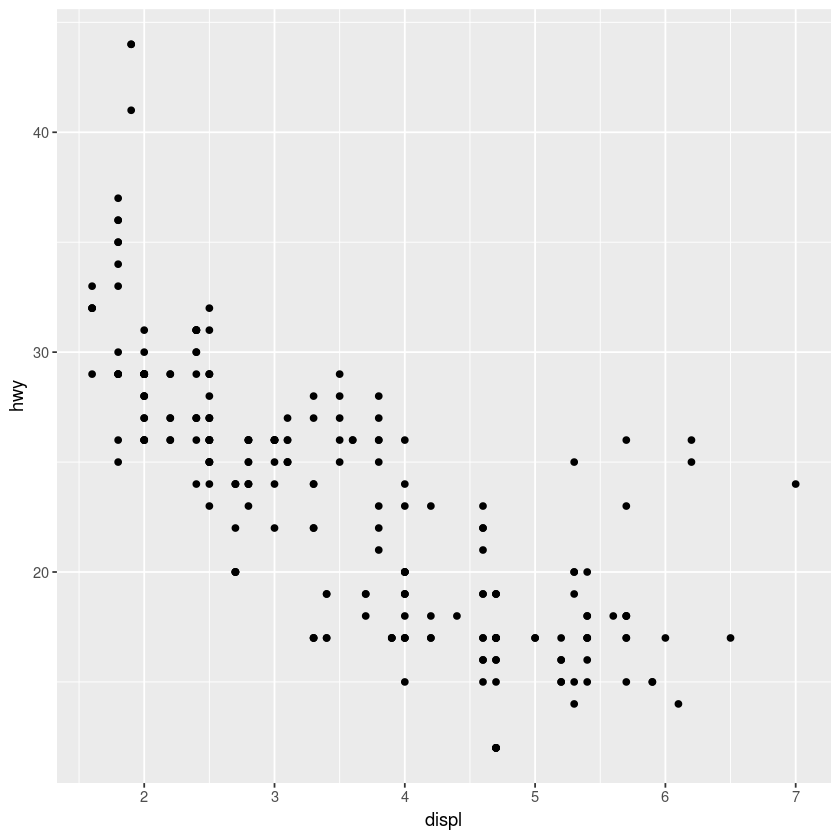

In [62]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy))

The values of hwy and displ are rounded so the points appear on a grid and many points overlap each other. This problem is known as overplotting. This arrangement makes it hard to see where the mass of the data is. Are the data points spread equally throughout the graph, or is there one special combination of hwy and displ that contains 109 values?

You can avoid this gridding by setting the position adjustment to “jitter”. position = "jitter" adds a small amount of random noise to each point. This spreads the points out because no two points are likely to receive the same amount of random noise.



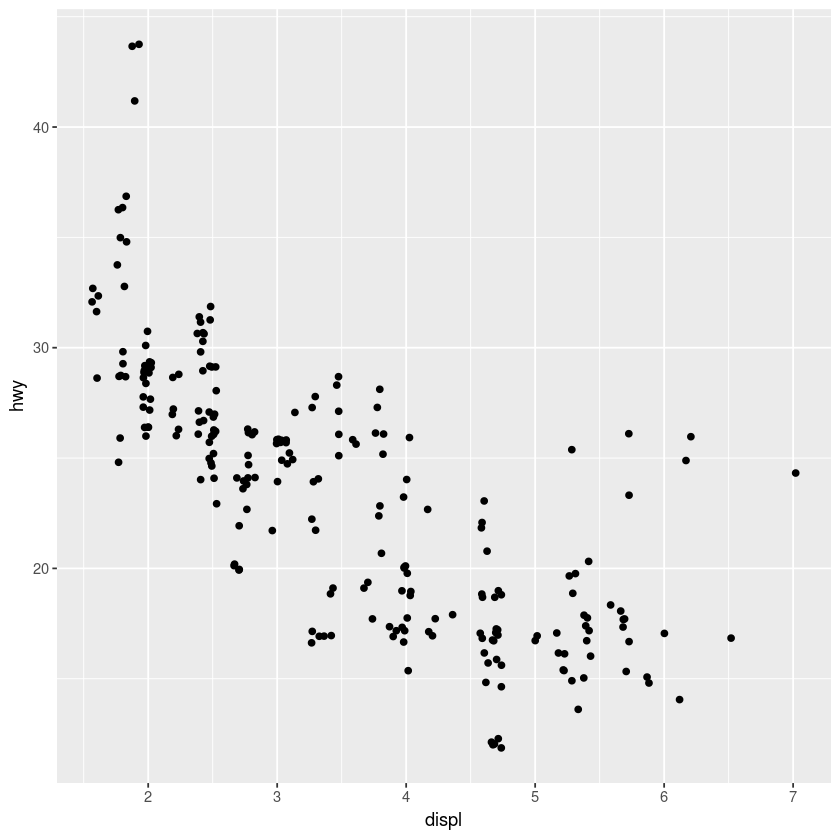

In [63]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy), position = "jitter")

Adding randomness seems like a strange way to improve your plot, but while it makes your graph less accurate at small scales, it makes your graph more revealing at large scales. Because this is such a useful operation, ggplot2 comes with a shorthand for geom_point(position = "jitter"): geom_jitter().



### Exercises

What is the problem with this plot? How could you improve it?



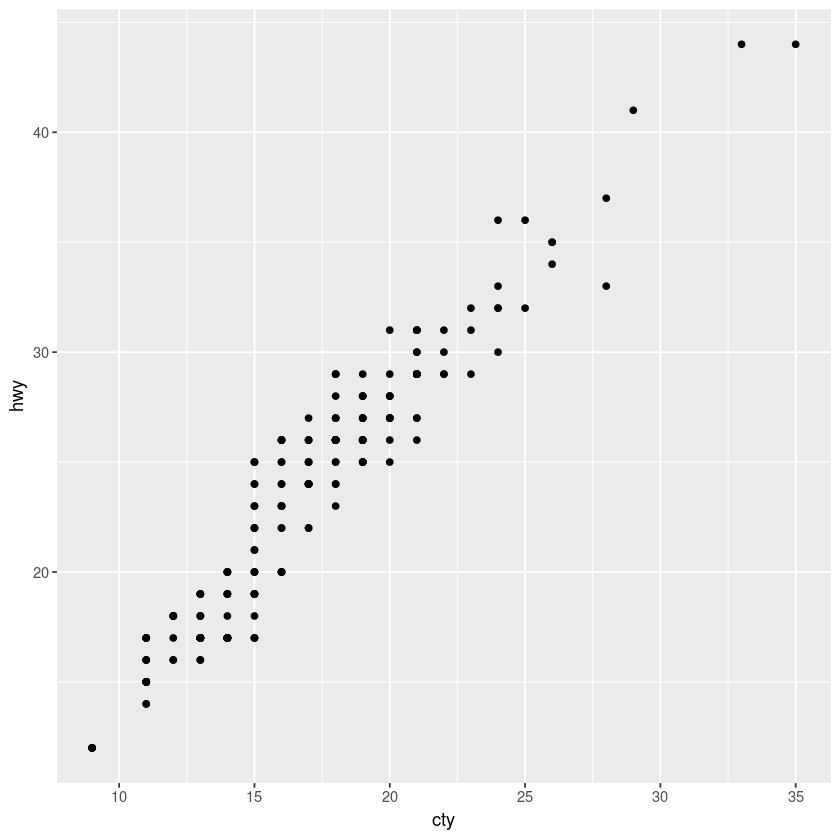

In [68]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) + 
  geom_point()

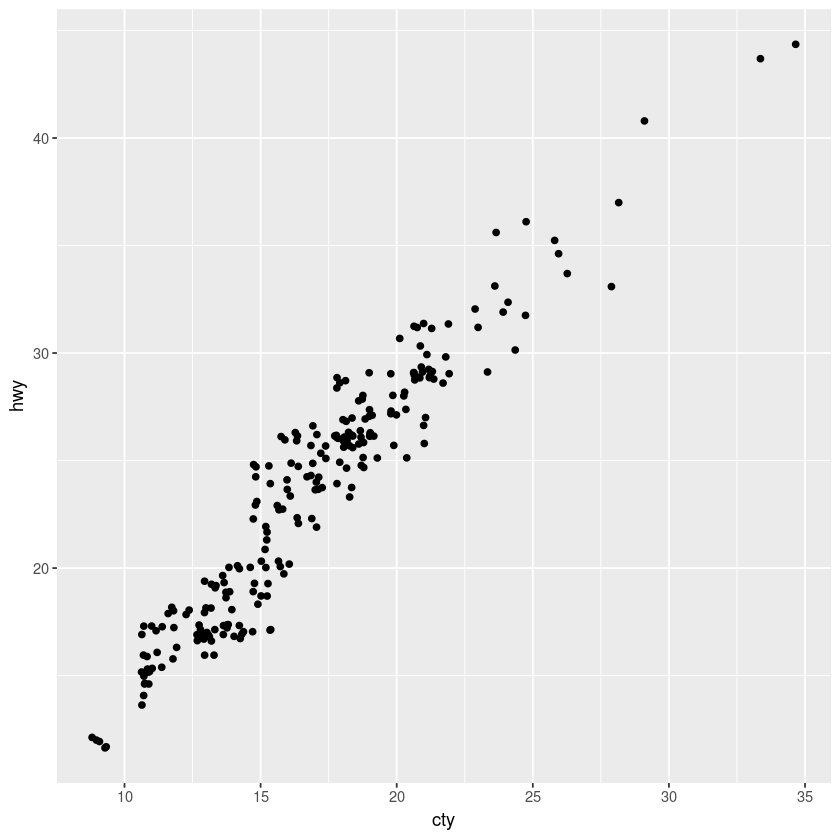

In [67]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) + 
  geom_point(position = "jitter")

What parameters to geom_jitter() control the amount of jittering?

- width and height

Compare and contrast geom_jitter() with geom_count().

- This is a variant geom_point() that counts the number of observations at each location, then maps the count to point area. 

What’s the default position adjustment for geom_boxplot()? Create a visualisation of the mpg dataset that demonstrates it.



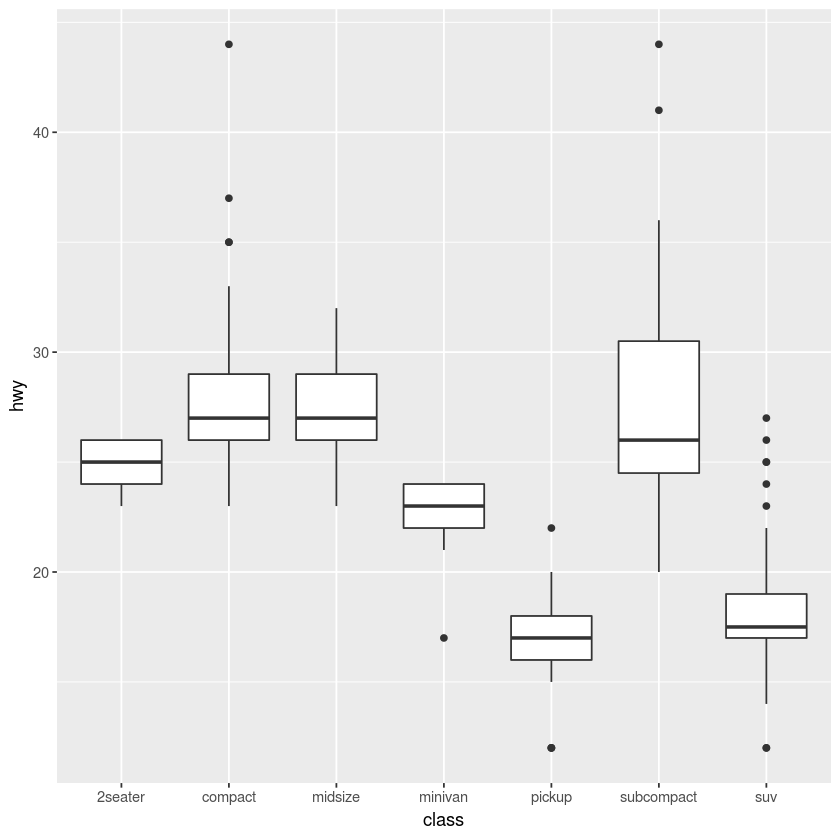

In [73]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
    geom_boxplot()

### Coordinate systems

Coordinate systems are probably the most complicated part of ggplot2. The default coordinate system is the Cartesian coordinate system where the x and y positions act independently to determine the location of each point. There are a number of other coordinate systems that are occasionally helpful.

- coord_flip() switches the x and y axes. This is useful (for example), if you want horizontal boxplots. It’s also useful for long labels: it’s hard to get them to fit without overlapping on the x-axis.

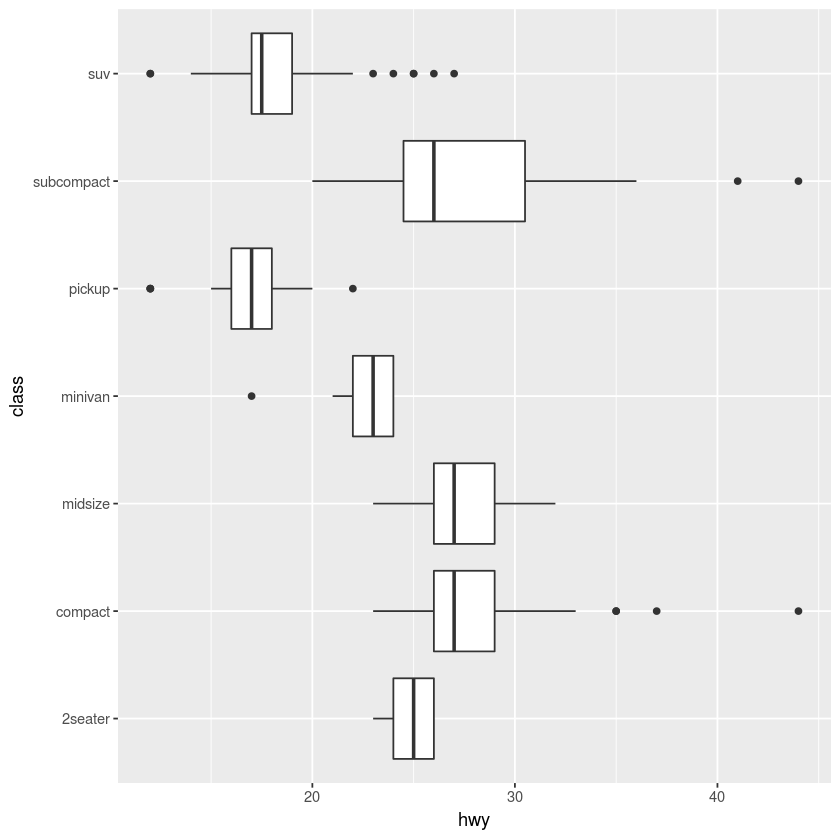

In [74]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
    geom_boxplot() +
    coord_flip()

- coord_quickmap() sets the aspect ratio correctly for maps. This is very important if you’re plotting spatial data with ggplot2 (which unfortunately we don’t have the space to cover in this book).

- coord_polar() uses polar coordinates. Polar coordinates reveal an interesting connection between a bar chart and a Coxcomb chart.



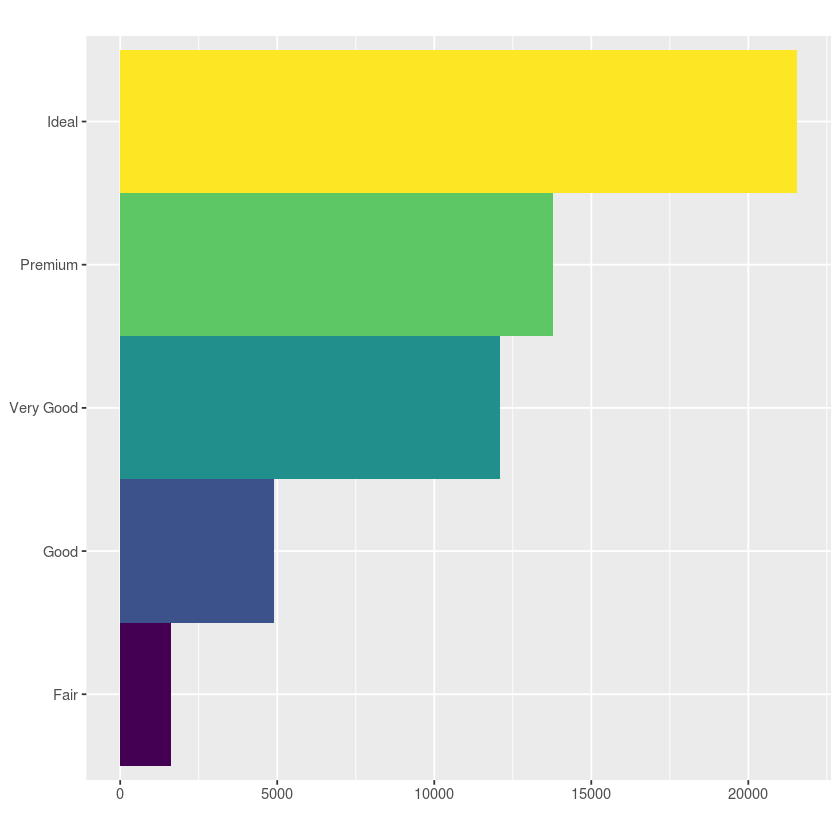

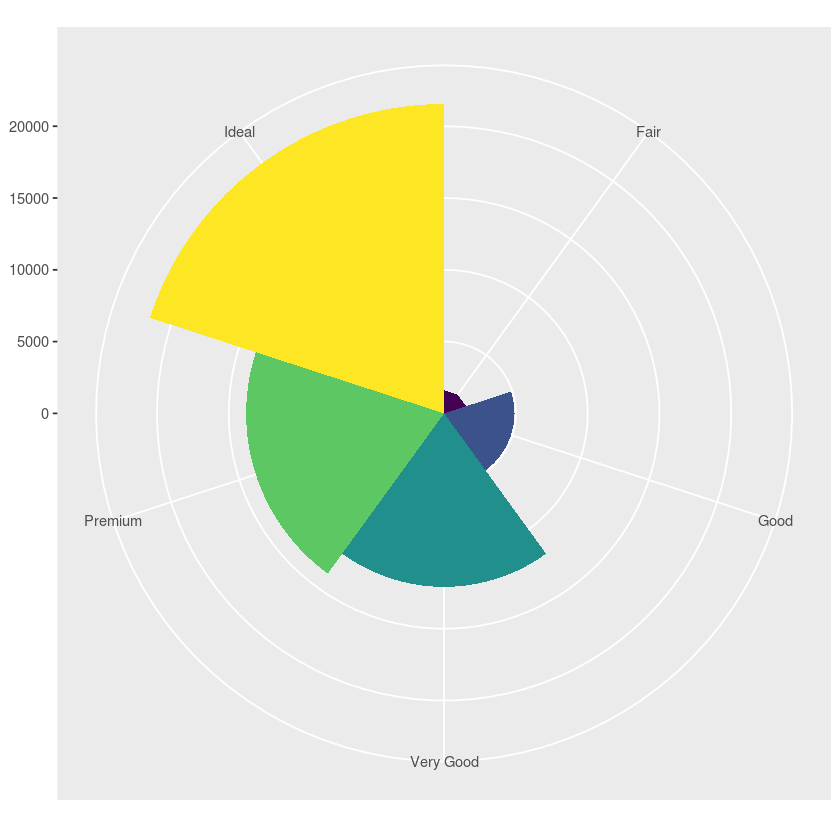

In [77]:
bar <- ggplot(data = diamonds) + 
  geom_bar(
    mapping = aes(x = cut, fill = cut), 
    show.legend = FALSE,
    width = 1
  ) + 
  theme(aspect.ratio = 1) +
  labs(x = NULL, y = NULL)

bar + coord_flip()
bar + coord_polar()

### The layered grammar of graphics

In the previous sections, you learned much more than how to make scatterplots, bar charts, and boxplots. You learned a foundation that you can use to make any type of plot with ggplot2. To see this, let’s add position adjustments, stats, coordinate systems, and faceting to our code template:

``` R

ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>

```

